# COVID-19 in Australia (from covidlive.com.au)

NOTE: Because the [covidlive](https://covidlive.com.au/) database is being updated throughout the day, it only makes sense to run this notebook at the end of the day when all of the data has been loaded for the day. In the last cell of this notebook, I warn where last-day data is missing (or looks odd), but this is imperfect.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-set-up" data-toc-modified-id="Python-set-up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python set-up</a></span><ul class="toc-item"><li><span><a href="#Usual-imports-etc." data-toc-modified-id="Usual-imports-etc.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Usual imports etc.</a></span></li><li><span><a href="#Other-useful-information" data-toc-modified-id="Other-useful-information-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Other useful information</a></span></li><li><span><a href="#Warnings" data-toc-modified-id="Warnings-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Warnings</a></span></li><li><span><a href="#State-populations-and-per-capita-calculations" data-toc-modified-id="State-populations-and-per-capita-calculations-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>State populations and per capita calculations</a></span></li></ul></li><li><span><a href="#Useful-functions" data-toc-modified-id="Useful-functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Useful functions</a></span><ul class="toc-item"><li><span><a href="#Seasonal-adjustment" data-toc-modified-id="Seasonal-adjustment-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Seasonal adjustment</a></span></li><li><span><a href="#Recent-daily-bar/scatter-and-moving-average-plots" data-toc-modified-id="Recent-daily-bar/scatter-and-moving-average-plots-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Recent daily bar/scatter and moving average plots</a></span></li></ul></li><li><span><a href="#Get-the-data-from-covidlive.com" data-toc-modified-id="Get-the-data-from-covidlive.com-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get the data from covidlive.com</a></span></li><li><span><a href="#Capture-cumulative-and-daily-data-for-selected-columns" data-toc-modified-id="Capture-cumulative-and-daily-data-for-selected-columns-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Capture cumulative and daily data for selected columns</a></span><ul class="toc-item"><li><span><a href="#Extraction" data-toc-modified-id="Extraction-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Extraction</a></span></li><li><span><a href="#!!!-CHECK---Raw-daily-new-cases---past-week" data-toc-modified-id="!!!-CHECK---Raw-daily-new-cases---past-week-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>!!! CHECK - Raw daily new cases - past week</a></span></li><li><span><a href="#Supporting-functions-for-accessing-the-corrected-data-for-a-period" data-toc-modified-id="Supporting-functions-for-accessing-the-corrected-data-for-a-period-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Supporting functions for accessing the corrected data for a period</a></span></li></ul></li><li><span><a href="#Weekly-charts---cases---deaths---tests---for-the-whole-pandemic" data-toc-modified-id="Weekly-charts---cases---deaths---tests---for-the-whole-pandemic-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Weekly charts - cases - deaths - tests - for the whole pandemic</a></span></li><li><span><a href="#Recent-daily-charts---cases,-deaths-and-tests" data-toc-modified-id="Recent-daily-charts---cases,-deaths-and-tests-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Recent daily charts - cases, deaths and tests</a></span></li><li><span><a href="#Bar-Charts---the-latest-cases,-deaths-and-tests" data-toc-modified-id="Bar-Charts---the-latest-cases,-deaths-and-tests-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Bar Charts - the latest cases, deaths and tests</a></span></li><li><span><a href="#Line-plots---cases,-deaths-and-tests" data-toc-modified-id="Line-plots---cases,-deaths-and-tests-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Line plots - cases, deaths and tests</a></span></li><li><span><a href="#Active-Cases" data-toc-modified-id="Active-Cases-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Active Cases</a></span><ul class="toc-item"><li><span><a href="#Bar-chart-of-active-cases" data-toc-modified-id="Bar-chart-of-active-cases-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Bar chart of active cases</a></span></li><li><span><a href="#Active-cases---line-plots" data-toc-modified-id="Active-cases---line-plots-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Active cases - line plots</a></span></li></ul></li><li><span><a href="#Explore-cases-to-deaths" data-toc-modified-id="Explore-cases-to-deaths-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Explore cases to deaths</a></span></li><li><span><a href="#Vaccination-plots" data-toc-modified-id="Vaccination-plots-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Vaccination plots</a></span><ul class="toc-item"><li><span><a href="#Get-data" data-toc-modified-id="Get-data-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Get data</a></span></li><li><span><a href="#Bar-plots" data-toc-modified-id="Bar-plots-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Bar plots</a></span></li><li><span><a href="#Timeline-plots" data-toc-modified-id="Timeline-plots-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>Timeline plots</a></span></li></ul></li><li><span><a href="#Hospitalised" data-toc-modified-id="Hospitalised-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Hospitalised</a></span><ul class="toc-item"><li><span><a href="#Get-the-hospital-data" data-toc-modified-id="Get-the-hospital-data-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>Get the hospital data</a></span></li><li><span><a href="#Recent-hospital-counts-daily" data-toc-modified-id="Recent-hospital-counts-daily-12.2"><span class="toc-item-num">12.2&nbsp;&nbsp;</span>Recent hospital counts daily</a></span></li><li><span><a href="#Progression" data-toc-modified-id="Progression-12.3"><span class="toc-item-num">12.3&nbsp;&nbsp;</span>Progression</a></span></li></ul></li><li><span><a href="#Source-of-infection" data-toc-modified-id="Source-of-infection-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Source of infection</a></span><ul class="toc-item"><li><span><a href="#Extraction" data-toc-modified-id="Extraction-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>Extraction</a></span></li><li><span><a href="#Check-latest-raw-SOI-data-against-raw-case-count-data" data-toc-modified-id="Check-latest-raw-SOI-data-against-raw-case-count-data-13.2"><span class="toc-item-num">13.2&nbsp;&nbsp;</span>Check latest raw SOI data against raw case count data</a></span></li></ul></li><li><span><a href="#Local-cases/transmission" data-toc-modified-id="Local-cases/transmission-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Local cases/transmission</a></span><ul class="toc-item"><li><span><a href="#Create-dataframe-for-local-transmission" data-toc-modified-id="Create-dataframe-for-local-transmission-14.1"><span class="toc-item-num">14.1&nbsp;&nbsp;</span>Create dataframe for local transmission</a></span></li><li><span><a href="#And-plot" data-toc-modified-id="And-plot-14.2"><span class="toc-item-num">14.2&nbsp;&nbsp;</span>And plot</a></span></li></ul></li><li><span><a href="#Outbreak-Growth-Factors" data-toc-modified-id="Outbreak-Growth-Factors-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Outbreak Growth Factors</a></span><ul class="toc-item"><li><span><a href="#New-cases---daily-growth-rate" data-toc-modified-id="New-cases---daily-growth-rate-15.1"><span class="toc-item-num">15.1&nbsp;&nbsp;</span>New cases - daily growth rate</a></span></li><li><span><a href="#Rolling-doubling-time" data-toc-modified-id="Rolling-doubling-time-15.2"><span class="toc-item-num">15.2&nbsp;&nbsp;</span>Rolling doubling time</a></span></li><li><span><a href="#Growth-Factors" data-toc-modified-id="Growth-Factors-15.3"><span class="toc-item-num">15.3&nbsp;&nbsp;</span>Growth Factors</a></span></li><li><span><a href="#Model-for-the-effective-reproduction-number-$R_{eff}$-using-an-SIR/SEIR-model" data-toc-modified-id="Model-for-the-effective-reproduction-number-$R_{eff}$-using-an-SIR/SEIR-model-15.4"><span class="toc-item-num">15.4&nbsp;&nbsp;</span>Model for the effective reproduction number $R_{eff}$ using an SIR/SEIR model</a></span></li><li><span><a href="#Comparative-$R_{eff}$-and-GF" data-toc-modified-id="Comparative-$R_{eff}$-and-GF-15.5"><span class="toc-item-num">15.5&nbsp;&nbsp;</span>Comparative $R_{eff}$ and GF</a></span></li><li><span><a href="#Short-run-projections-for-local-new-case-growth" data-toc-modified-id="Short-run-projections-for-local-new-case-growth-15.6"><span class="toc-item-num">15.6&nbsp;&nbsp;</span>Short-run projections for local new case growth</a></span></li></ul></li><li><span><a href="#The-End" data-toc-modified-id="The-End-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>The End</a></span></li></ul></div>

## Python set-up

### Usual imports etc.

In [1]:
# global imports
import sys
from pathlib import Path
import datetime

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.units as munits
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

from typing import List, Dict, Tuple, Set, Optional, Any, Iterable, Callable

# local imports
sys.path.append(r"../bin")
import plotstuff as ps
import Henderson

# pandas
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

# plotting
plt.style.use("ggplot")

# matplotlib stuff for date formatting xticklabels
converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
munits.registry[datetime.date] = converter
munits.registry[datetime.datetime] = converter
munits.registry[pd.Timestamp] = converter
munits.registry[pd.Period] = converter

In [2]:
!file `which python`

/Users/bryanpalmer/miniconda3/bin/python: Mach-O 64-bit executable x86_64


### Other useful information

In [3]:
# save location
CHART_DIRECTORY = "../charts"
Path(CHART_DIRECTORY).mkdir(parents=True, exist_ok=True)
CHART_DIRECTORY += "/!AS2-"

SOURCE = "Source: https://covidlive.com.au/"

state_order = ["NSW", "Victoria", "Queensland", "WA", "SA", "Tasmania", "ACT", "NT"]
state_palette = {
    # colours from the R strayr package
    "NSW": '#87ceeb',
    "Victoria": '#000080', 
    "Queensland": '#800000', 
    "WA": '#fecb29', 
    "SA": '#dc0014', 
    "Tasmania": '#006a4e', 
    "ACT": '#94c949', 
    "NT": '#e65a00',
    "Australia": '#000000',
}

# used in charts of the recent period
RECENT = 183  # days

# standard plot settings - used in calls to ps.finalise_plot()
std_barchart_settings = {
    "chart_directory": CHART_DIRECTORY,
    "rfooter": SOURCE,
    "show": True,
}

std_plot_settings = {
    "margins": 0.02,
    **std_barchart_settings,
}

# Assumed mean times to event from diagnosis (positive PCR test result)
# need more empirical data for this 
# Also note, may vary with COVID variant
TO_HOSPITAL = 9 # days
TO_DEATH = 14 # days

### Warnings

In [4]:
warning_count = 0
warnings = set()


def warn(message: str) -> None:
    global warning_count
    if message:
        if message not in warnings:
            warning_count += 1
        print(message)
        warnings.add(message)
    return None


def print_warnings() -> None:
    if warning_count == 0:
        return None
    print(f'NOTE: {warning_count} warning{"s" if warning_count > 1 else ""}')
    for m in warnings:
        print(m)
    return None

### State populations and per capita calculations

In [5]:
# data compiled from ABS tables for age by year by state
# https://www.abs.gov.au/statistics/people/population/national-state-and-territory-population/dec-2020#data-download
# see notebook in directory ../abs, which generates the dictionaries below.

# Constants across all tests
state_pop = {
    "NSW": 8167063,
    "Victoria": 6693860,
    "Queensland": 5175273,
    "SA": 1770279,
    "WA": 2664227,
    "Tasmania": 540536,
    "NT": 246223,
    "ACT": 431215,
}
state_pop["Australia"] = sum(state_pop.values())
print(f'Australian population: {state_pop["Australia"]:,}')

eligible_pop = {
    "NSW": 6566315,
    "Victoria": 5407782,
    "Queensland": 4112658,
    "SA": 1440472,
    "WA": 2115294,
    "Tasmania": 440192,
    "NT": 190651,
    "ACT": 344008,
}
eligible_pop["Australia"] = sum(eligible_pop.values())
print(f'Australian eligible population: {eligible_pop["Australia"]:,}')

# per capita ...
power = 6
power_conversion = {
    0: "Unit",
    3: "Thousand",
    6: "Million",  # beyond here is a bit silly ...
    9: "Billion",
    12: "Trillion",
    15: "Quadrillion",
    18: "Quintillion",
}
if power not in power_conversion.keys():
    power = 6
power_text = power_conversion[power]
factor = 10 ** power
state_pop = pd.Series(state_pop) / factor
eligible_pop = pd.Series(eligible_pop) / factor

Australian population: 25,688,676
Australian eligible population: 20,617,372


## Useful functions

### Seasonal adjustment

In [6]:
def weekly_adjust(series:pd.Series) -> pd.Series:
    """A weekly, multiplicative, seasonal adjustment to a time series.
       Assumes all values in series are > 0."""
    
    decomp = seasonal_decompose(series, period=7, model='multiplicatve')
    adjusted = series / decomp.seasonal
    #print(decomp.seasonal)
    return adjusted

### Recent daily bar/scatter and moving average plots

In [7]:
## Private funtions

def get_selected_list(d:Dict[str, Any], selection:List[str], keep:bool=False
                ) -> Dict[str, Any]:
    """Return in a dictionary the items in the input dictionary d that
       are in the list selection. Do not change the original dictionary"""
    returnable = {key: d[key] for key in selection if key in d}
    for key in selection:
        if key in d and not keep:
            del d[key]
    return returnable


def get_selected_item(d:Dict[str, Any], key:str, default:Any=None, keep:bool=False) -> Any:
    """Return the item from the dictionary d with key, or return the default.
       Delete thie item from the dictionary if it was found there."""
    returnable = d[key] if key in d else default
    if key in d and not keep:
        del d[key]
    return returnable


def add_defaults(dictionary:Dict[str, Any], default_dict:Dict[str, Any]
                ) -> Dict[str, Any]:
    """Add default values to a dictionary, if they are not present in the 
       dictionary. Return the compilation as a new dictionary."""
    return {**default_dict, **dictionary}


def scatter(ax:plt.axes, series:pd.Series, kwargs:Dict[str, Any]):
    """Add a scatter plot to an axes."""
    recent = get_selected_item(kwargs, key='recent', default=0)
    USE = ('c', 's', 'alpha', 'label')
    DEFAULTS = {'c': '#dd0000', 's': 10}
    params = add_defaults(get_selected_list(kwargs, USE), DEFAULTS)
    ax.scatter(series.index[-recent:], series.iloc[-recent:], **params)
    return None


def line(ax:plt.axes, series:pd.Series, kwargs:Dict[str, Any]) -> None:
    """Add a line plot to a chart."""
    recent = get_selected_item(kwargs, key='recent', default=0)
    USE = ('color', 'c', 'alpha', 'label', 'linestyle', 'ls',
           'linewidth', 'lw', 'marker')
    param = get_selected_list(kwargs, USE)
    ax.plot(series.index[-recent:], series.iloc[-recent:], **param)
    return None


def bar(ax:plt.axes, series:pd.Series, kwargs:Dict[str, Any]) -> None:
    """Add a bar plot to a chart."""
    recent = get_selected_item(kwargs, key='recent', default=0)
    USE = ('color', 'c', 'alpha', 'label', 'width')
    param = get_selected_list(kwargs, USE)
    ax.bar(series.index[-recent:], series.iloc[-recent:], **param)
    return None


def annotate_barh(ax:plt.axes, series:pd.Series, kwargs:Dict[str, Any]) -> None:
    # annotate the plot
    round_ = get_selected_item(kwargs, key='round', default=None)
    span = series.max() - series.min()
    inside = series.min() + span / 2.0
    spacer = span / 150.0
    for y, x in enumerate(series):
        xpos = x if x < inside else 0
        color = "black" if xpos > 0 else "white"
        x = round(x, round_) if round_ else x
        ax.annotate(
            f"{x:,}", xy=(xpos + spacer, y), 
            va="center", color=color, size="small"
        )
    return None


def barh(ax:plt.axes, series:pd.Series, kwargs:Dict[str, Any]) -> None:
    """Add a horizontal bar chart."""
    USE = ('color', 'c', 'alpha', 'label', 'width')
    param = get_selected_list(kwargs, USE)
    ax.barh(series.index.values, series.values, **param)
    annotate_barh(ax, series, kwargs)
    return None


def multi_ma(ax:plt.axes, series:pd.Series, kwargs:Dict[str, Any]) -> None:
    """Add one or more moving averages to a chart."""
    
    periods = get_selected_item(kwargs, key='periods', default=[7, 14])
    colors = get_selected_item(kwargs, key='colors', default=['dodgerblue', 'navy'])
    linestyles = get_selected_item(kwargs, key='linestyles', default=['-', '-'])
    linewidths = get_selected_item(kwargs, key='linewidths', default=[1.5, 2.5])
    
    for i, period in enumerate(periods):
        ma = series.rolling(period, center=True).mean()
        arg_dict = kwargs.copy()
        arg_dict['c'] = colors[i%len(colors)]
        arg_dict['ls'] = linestyles[i%len(linestyles)]
        arg_dict['lw'] = linewidths[i%len(linewidths)]
        arg_dict['label'] = f'{period}-day centred moving average'
        line(ax, ma, {**kwargs, **arg_dict})
    return None

In [8]:
## Private

SCALES = {
    0: '',
    3: 'thousand', 6: 'million', 9: 'billion',
    12: 'trillion', 15: 'quadrillion', 18: 'quintillion',
}

def scale_series(series:pd.Series, kwargs:Dict[str, Any]) -> Tuple[pd.Series, int, str]:
    """Scale a series, if 'scale_y'=True in kwargs. Also adjust ylabel text
       if that is present in kwargs. Factor is as in 10 ** factor. 
       Returns a tuple: adjusted series, factor, factor-text."""
    
    # do we need to act
    scale_y = get_selected_item(kwargs, 'scale_y', default=False)
    scale_x = get_selected_item(kwargs, 'scale_x', default=False)
    if not scale_x and not scale_y:
        return series, 0, ''
    
    label = 'xlabel' if scale_x else 'ylabel'
    max = series.abs().max()
    factor = 0 if max < 1000 else np.floor(np.log10(max) / 3.0) * 3
    if factor > 0:
        if label not in kwargs:
            kwargs[label] = f'{SCALES[factor].title()}'
        else:
            kwargs[label] = f'{kwargs[label]} ({SCALES[factor]})'
    return (series / (10 ** factor), factor, SCALES[factor])

In [9]:
## Public
def plot_series_with_ma(series, **kwargs) -> None:
    """Plot recent daily incidence data onto a scatter plot or bar chart 
       with moving averages."""

    # Some standard arguemnts
    recent = get_selected_item(d=kwargs, key='recent', default=0, keep=True)
    trunc_series = series[-recent:]
    if trunc_series.isna().all() or trunc_series.sum() == 0:
        return None
    lfooter = f'Total in period: {int(trunc_series.sum()):,}'
    
    # data scaling ...
    series, factor, f_text = scale_series(series, kwargs)
    
    # individual plot
    plot_type = get_selected_item(kwargs, key='plot_type', default='scatter')
    fig, ax = plt.subplots()
    kwargs_copy = kwargs.copy()
    if plot_type == 'bar':
        bar(ax, series, kwargs_copy)
    else:
        scatter(ax, series, kwargs_copy)
    
    # plot moving averages
    multi_ma(ax, series, kwargs)

    # finalise
    ax.legend(loc='best')
    ps.finalise_plot(ax, **kwargs)
    return None

In [10]:
def _get_day(series):
    # find the last day of a pandas Series or DataFrame
    last_day = series.dropna().index[-1]  # last day with data
    return {
        0: "W-MON",
        1: "W-TUE",
        2: "W-WED",
        3: "W-THU",
        4: "W-FRI",
        5: "W-SAT",
        6: "W-SUN",
    }[last_day.dayofweek]


def adjust_ylim(ax, series) -> None:
    # Note: assume a zero minimum.
    MARGIN = 0.02
    maxi = series.max()
    ax.set_ylim([0, maxi*(1+MARGIN)])

    
def adjust_xlim(ax, axr, cum):
    MARGIN = 0.02
    mini = cum.index.min()
    maxi = cum.index.max()
    span = (maxi - mini) / pd.Timedelta(days=1)
    adjustment = pd.Timedelta(days=(span / 2) * MARGIN)
    ax.set_xlim([mini-adjustment, maxi+adjustment])

def plot_weekly(series:pd.Series, **kwargs):
    
    recent = get_selected_item(d=kwargs, key='recent', default=0)
    daily = series[-recent:].dropna()
    
    rule = _get_day(series)
    weekly = daily.resample(rule=rule, closed="right").sum()
    max_weekly = weekly.max()
    last_week = weekly.iloc[-1]
    weekly.index = weekly.index - pd.Timedelta(3.5, unit="d")
    cum = daily.cumsum()
    max_cum = cum.iloc[-1]
    
    if max_cum <= 0:
        # Noting to see here
        return None
    
    kwargs['title'] = '' if 'title' not in kwargs else f'Weekly New {kwargs["title"]}'
    wkwargs = kwargs.copy()
    wkwargs['width'] = 5
    wkwargs['color'] = '#cc0000'
    wkwargs['ylabel'] = '' if 'ylabel' not in wkwargs else f'Weekly New {wkwargs["ylabel"]}'
    weekly, wfactor, wf_text = scale_series(weekly, wkwargs)
    wkwargs['label'] = wkwargs['ylabel']
    
    ckwargs = kwargs.copy()
    ckwargs['color'] = 'navy'
    ckwargs['lw'] = '2.5'
    ckwargs['ls'] = '-.'
    ckwargs['ylabel'] = '' if 'ylabel' not in ckwargs else f'Cum. {ckwargs["ylabel"]}'
    cum, cfactor, cf_text = scale_series(cum, ckwargs)
    right_ylabel = ckwargs['ylabel']
    ckwargs['label'] = ckwargs['ylabel']

    # plot
    fig, ax = plt.subplots()
    bar(ax, weekly, wkwargs)
    axr = ax.twinx()
    line(axr, cum, ckwargs)
    
    # adjustments because I am twinning the x axis
    axr.set_ylabel(right_ylabel)
    axr.grid(False)
    adjust_ylim(ax, weekly)
    adjust_ylim(axr, cum)
    adjust_xlim(ax, axr, cum)
    
    # legend
    h1, l1 = ax.get_legend_handles_labels()
    h2, l2 = axr.get_legend_handles_labels()
    ax.legend(h1 + h2, l1 + l2, loc="best", fontsize="small")
    
    wkwargs['lfooter'] = (
        f'WE={rule[-3:].title()}; '
        f'Max weekly={int(max_weekly):,}; '
        f'Over the past week={int(last_week):,}; '
        f'Cum. total={int(max_cum):,}'
    )
    
    ps.finalise_plot(ax, **wkwargs)
    return None

In [134]:
def loop_over_frame(df:pd.DataFrame, desc:str, func:Callable, **kwargs):
    
    for name in df.columns:
        print(name)
        kwargs_copy = kwargs.copy()
        series = df[name]
        kwargs_copy['title'] = f'{desc.title()} - {name}' if 'title' not in kwargs_copy else kwargs_copy['title']
        kwargs_copy['ylabel'] = desc.capitalize() if 'ylabel' not in kwargs_copy else kwargs_copy['ylabel']
        
        func(
            series,
            **kwargs_copy,
        )
        
    return None

In [12]:
def plot_final_barh(df, **kwargs):
    
    # get latest values
    series = df.ffill().iloc[-1]
    last_valid = df.apply(pd.Series.last_valid_index)
    labels = (
        # Hint: if this is printing rge day as a float, 
        # then you have NaT in yout index. 
        last_valid.dt.day.astype(str) 
        + "-" 
        + last_valid.dt.month_name().astype(str).str[:3]
    )
    series.index = series.index.astype(str) + ' ' + labels
    
    # scale and sort the data series
    series, factor, f_text = scale_series(series, kwargs)
    force_int = get_selected_item(kwargs, key='force_int', default=False)
    if force_int and not factor: 
        series = series.astype(int)
    series = series.sort_values().copy()
    
    # plot
    fig, ax = plt.subplots()
    barh(ax, series, kwargs)
    ps.finalise_plot(ax, **kwargs)

In [62]:
def plot_multiline(df, **kwargs):
    color_dict = get_selected_item(kwargs, key='color_dict', default=None)
    USE = ('alpha', 'linestyle', 'ls',
           'linewidth', 'lw', 'marker',)
    param = get_selected_list(kwargs, USE)
    param['recent'] = get_selected_item(kwargs, key='recent', default=0)
    
    fig, ax = plt.subplots()
    for col in df.columns:
        p = param.copy()
        if color_dict:
            p['c'] = color_dict[col]
        p['label'] = col
        line(ax, df[col], p)
    legend = {'loc': 'best', }
    if 'legend_ncol' in kwargs:
        legend['ncol'] = get_selected_item(kwargs, key='legend_ncol', default=1)
    ax.legend(**legend)
    ps.finalise_plot(ax, **kwargs)    

## Get the data from covidlive.com

In [14]:
def get_data_from_JSON():
    """ Get the latest data from covidlive.com.au
        Return the complete DataFrame downloaded 
        from covidlive.com.au, using the JSON API"""

    # get the data
    url = "https://covidlive.com.au/covid-live.json"
    data = pd.read_json(url)

    # convert REPORT_DATE to pandas Series of datetime64 items
    data.REPORT_DATE = pd.to_datetime(data.REPORT_DATE)

    # issue a warning if records exist ahead of today
    today = pd.Timestamp(datetime.datetime.now().date())
    if (data.REPORT_DATE > today).any():
        warn(f"Warning: There are records into the future?")
        all_frame = all_frame[data.REPORT_DATE <= today]

    # return
    return data

In [15]:
# obtain the latest data ...
raw_json_data = get_data_from_JSON()

In [16]:
# Quick peak at the data columns
raw_json_data.columns

Index(['REPORT_DATE', 'LAST_UPDATED_DATE', 'CODE', 'NAME', 'CASE_CNT',
       'TEST_CNT', 'DEATH_CNT', 'RECOV_CNT', 'MED_ICU_CNT', 'MED_VENT_CNT',
       'MED_HOSP_CNT', 'SRC_OVERSEAS_CNT', 'SRC_INTERSTATE_CNT',
       'SRC_CONTACT_CNT', 'SRC_UNKNOWN_CNT', 'SRC_INVES_CNT', 'PREV_CASE_CNT',
       'PREV_TEST_CNT', 'PREV_DEATH_CNT', 'PREV_RECOV_CNT', 'PREV_MED_ICU_CNT',
       'PREV_MED_VENT_CNT', 'PREV_MED_HOSP_CNT', 'PREV_SRC_OVERSEAS_CNT',
       'PREV_SRC_INTERSTATE_CNT', 'PREV_SRC_CONTACT_CNT',
       'PREV_SRC_UNKNOWN_CNT', 'PREV_SRC_INVES_CNT', 'PROB_CASE_CNT',
       'PREV_PROB_CASE_CNT', 'ACTIVE_CNT', 'PREV_ACTIVE_CNT', 'NEW_CASE_CNT',
       'PREV_NEW_CASE_CNT', 'VACC_DIST_CNT', 'PREV_VACC_DIST_CNT',
       'VACC_DOSE_CNT', 'PREV_VACC_DOSE_CNT', 'VACC_PEOPLE_CNT',
       'PREV_VACC_PEOPLE_CNT', 'VACC_AGED_CARE_CNT', 'PREV_VACC_AGED_CARE_CNT',
       'VACC_GP_CNT', 'PREV_VACC_GP_CNT', 'VACC_FIRST_DOSE_CNT',
       'PREV_VACC_FIRST_DOSE_CNT', 'VACC_FIRST_DOSE_CNT_12_15',
       '

In [17]:
# Quick look at the categorising column
map_from = sorted(raw_json_data.NAME.unique())
map_to = sorted(raw_json_data.CODE.unique())
state_name_map = {f: t for f, t in zip(map_from, map_to)}
state_name_map

{'ACT': 'ACT',
 'Australia': 'AUS',
 'NSW': 'NSW',
 'NT': 'NT',
 'Queensland': 'QLD',
 'SA': 'SA',
 'Tasmania': 'TAS',
 'Victoria': 'VIC',
 'WA': 'WA'}

## Capture cumulative and daily data for selected columns

### Extraction

In [18]:
selected_cols = {
    # column name      # plain English for charts
    "CASE_CNT": "cases",
    "DEATH_CNT": "deaths",
    "TEST_CNT": "tests",
}

In [19]:
def get_pivot_table(raw_json_data, item):
    """Return a DataFrame of data for the specified item from the raw_json_data
       The columns will be Australian states, plus the Australian total.
       The rows will be dates, in ascending date order.
       Provide warnings for mallformed data."""

    table = raw_json_data.pivot(
        index="REPORT_DATE", columns="NAME", values=item
    ).sort_index(ascending=True)

    # if state totals have NaNs, change a non-NaN 'Australia' to NaN
    states = table.columns.to_list()
    if "Australia" in states:
        states.remove("Australia")
        odd_rows = table[states].isna().any(axis=1) & table["Australia"].notna()
        if odd_rows.any():
            fix_these_rows = odd_rows[odd_rows].index
            # warn(f'Nullifying these Australian totals in {item} '
            #     f'{fix_these_rows.to_list()}')
            table.loc[fix_these_rows, "Australia"] = np.nan

    # drop all-NaN rows
    missing_rows = table.isna().all(axis=1)
    if missing_rows.any():
        drop_these_rows = missing_rows[missing_rows].index
        # warn(f'Dropping all-NaN rows from {item}: {drop_these_rows.to_list()}')
        table.drop(drop_these_rows, inplace=True)

    # check if missing values in last row (but not missing in penultimate row)
    situation = table.iloc[-1].isna() & table.iloc[-2].notna()
    if situation.sum():
        warn(
            f"We are missing the latest {item} "
            f'for {", ".join(situation[situation].index.to_list())}'
        )

    # check if last cumulative value is less than its predecessor ...
    not_max = table.iloc[-1] < table.iloc[-2]
    if not_max.sum():
        warn(
            f"Lastest value less than its predecessor in {item} "
            f'for {", ".join(not_max[not_max].index.to_list())}'
        )

    return table

In [20]:
def get_item(item, raw_json_data):
    """Return a DataFrame dates-x-states for item.
       Ensure early NaNs are mapped to zero.
       But keep any NaNs at the end of the table."""

    raw = get_pivot_table(raw_json_data, item)
    end_nan_mask = raw.isna().astype(float).replace(1.0, np.nan).bfill().isna()

    data = raw.ffill().fillna(0).where(~end_nan_mask, other=np.nan)

    return data

In [21]:
def get_data_with_adjustments():
    cum_u = {}
    daily_u = {}
    daily_c = {}
    cum_c = {}

    for item in selected_cols.keys():
        # get the raw cumulative data
        cum_u[item] = get_item(item, raw_json_data)

        # adjusted daily and cumulative data (for corrections)
        daily_u[item], daily_c[item], cum_c[item] = ps.dataframe_correction(
            cum_u[item], verbose=False
        )

    return cum_u, daily_u, daily_c, cum_c


cum_u, daily_u, daily_c, cum_c = get_data_with_adjustments()

### !!! CHECK - Raw daily new cases - past week

In [22]:
# Check - raw daily new cases
cum_u["CASE_CNT"].diff()[-4:]

NAME            ACT  Australia      NSW     NT  Queensland      SA  Tasmania  \
REPORT_DATE                                                                    
2022-01-11   2058.0    92830.0  25658.0  692.0     20553.0  2877.0    1367.0   
2022-01-12   1052.0   106003.0  34636.0  473.0     22061.0  4377.0    1579.0   
2022-01-13   1303.0   153123.0  91715.0  708.0     14897.0  3578.0    1092.0   
2022-01-14   2247.0   131153.0  63018.0  546.0     23617.0  5679.0    1201.0   

NAME         Victoria    WA  
REPORT_DATE                  
2022-01-11    39610.0  15.0  
2022-01-12    41819.0   6.0  
2022-01-13    39814.0  16.0  
2022-01-14    34836.0   9.0

### Supporting functions for accessing the corrected data for a period

In [23]:
def _prune(series, start, stop):
    s = series[series.index >= pd.Timestamp(start)]
    if stop:
        s = s[s.index <= pd.Timestamp(stop)]
    return s


def _get_data(item, state, start, stop):
    data = daily_c[item][state].dropna()  # for NaNs at series end
    return _prune(data, start, stop)


def _get_data_direct(item, state, start, stop):
    data = get_item(item, raw_json_data)[state].dropna()
    return _prune(data, start, stop)

## Weekly charts - cases - deaths - tests - for the whole pandemic

ACT


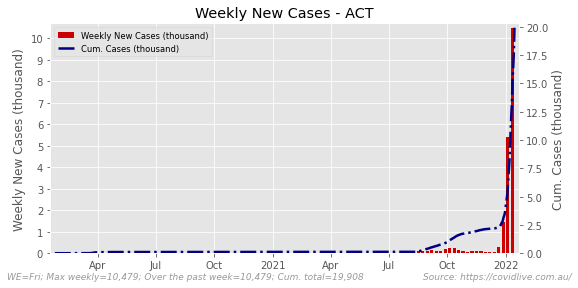

Australia


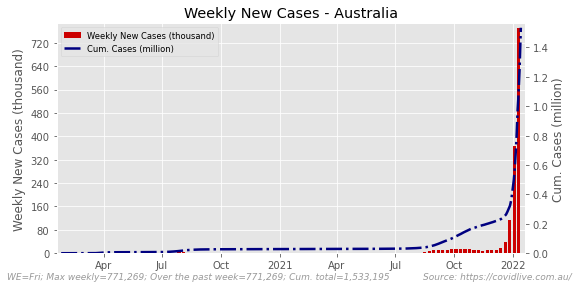

NSW


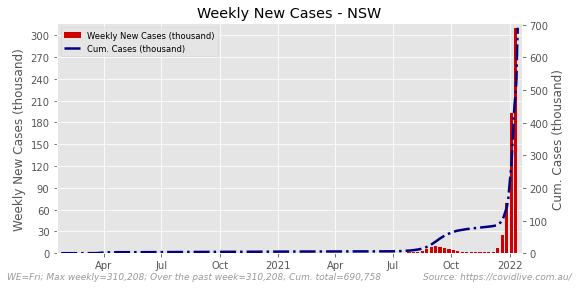

NT


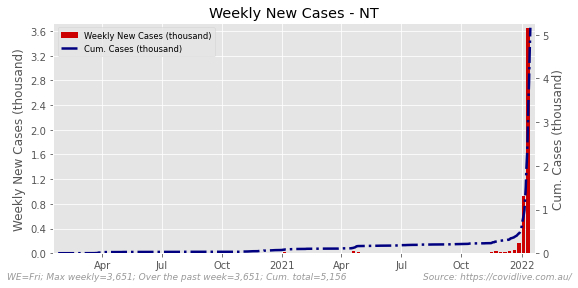

Queensland


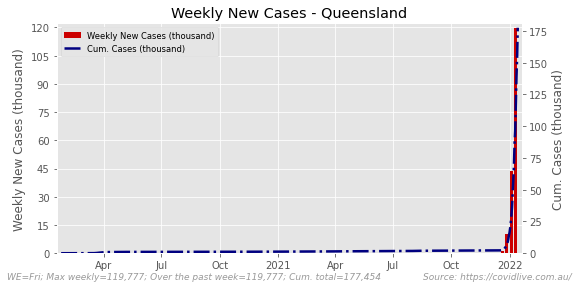

SA


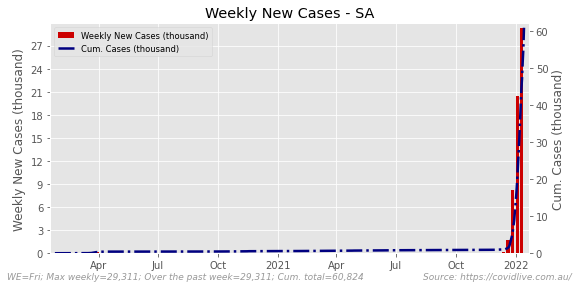

Tasmania


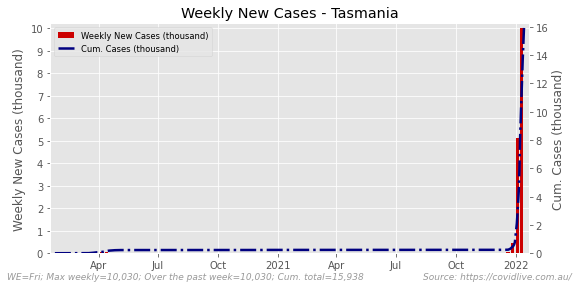

Victoria


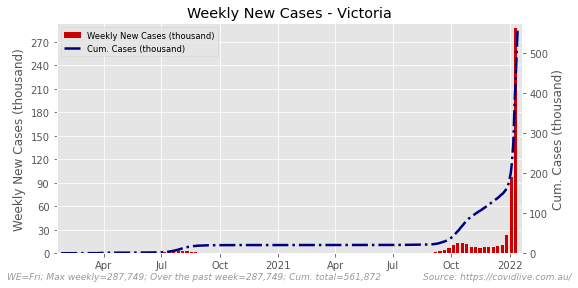

WA


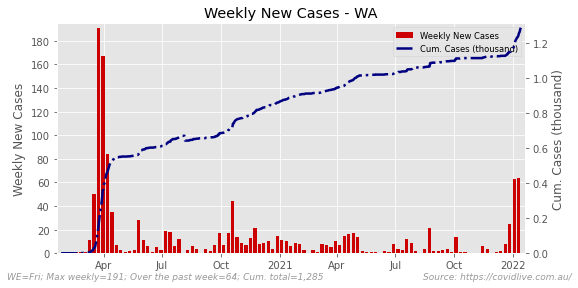

ACT


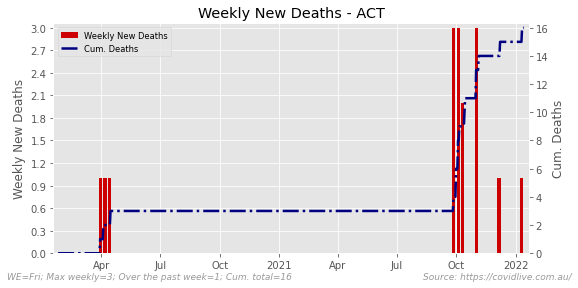

Australia


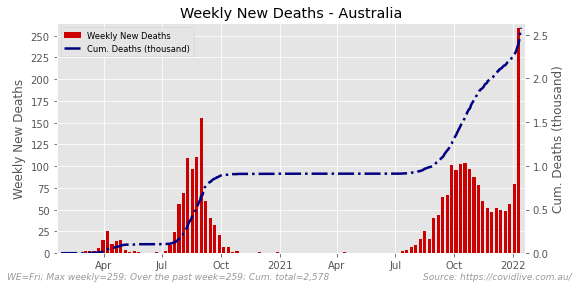

NSW


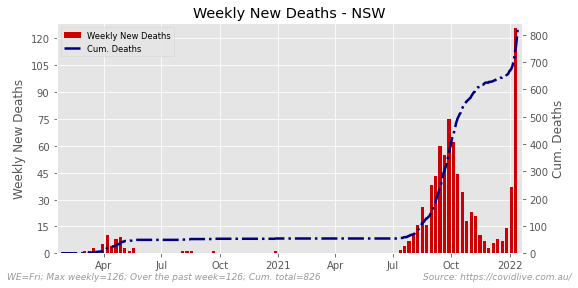

NT


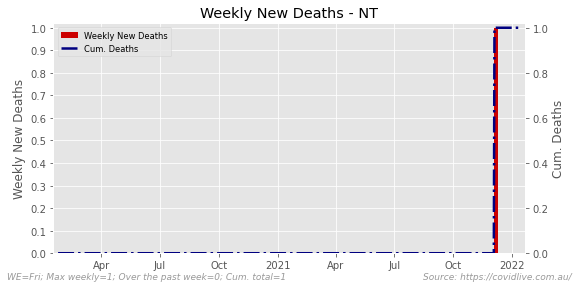

Queensland


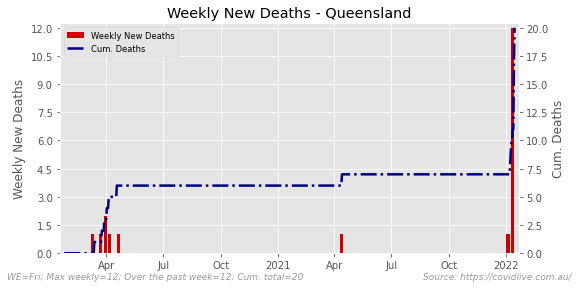

SA


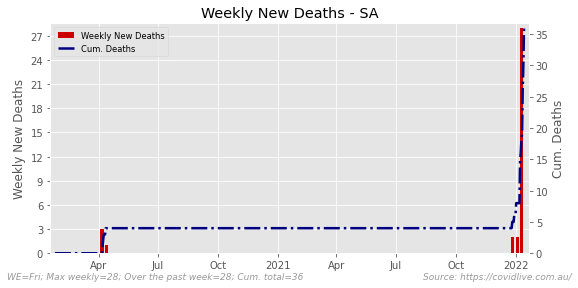

Tasmania


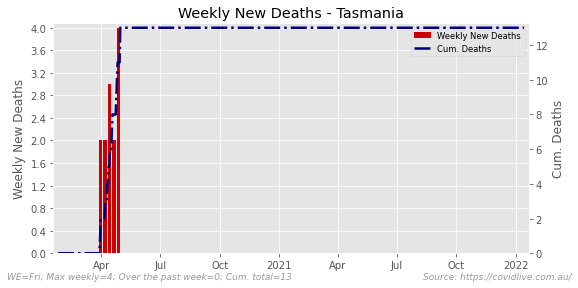

Victoria


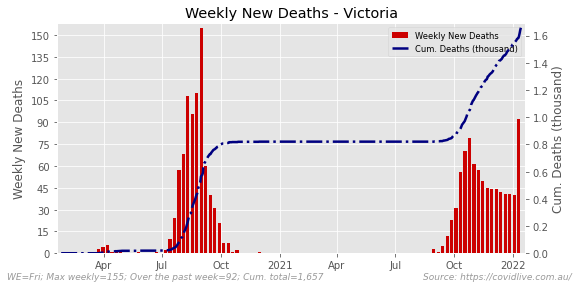

WA


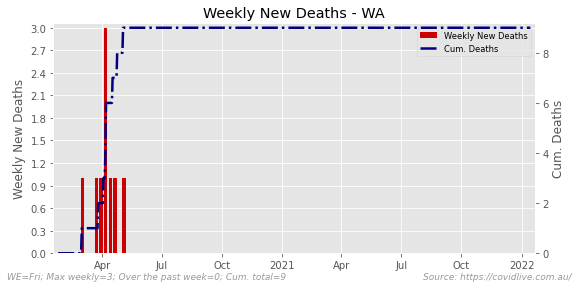

In [24]:
# Note: using unadjusted here ...

loop_over_frame(df=daily_u['CASE_CNT'], 
                desc='cases', 
                func=plot_weekly, 
                scale_y=True,
                **std_plot_settings)

loop_over_frame(df=daily_u['DEATH_CNT'], 
                desc='deaths', 
                func=plot_weekly, 
                scale_y=True,
                **std_plot_settings)

## Recent daily charts - cases, deaths and tests

ACT


	to finalise_plot() is not recognised.


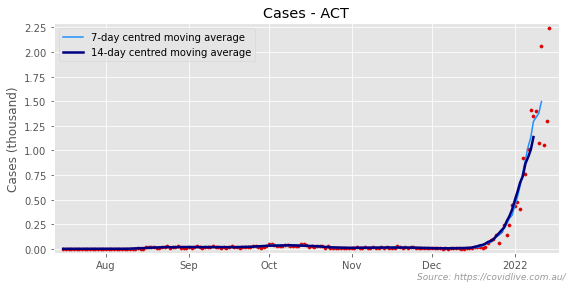

Australia


	to finalise_plot() is not recognised.


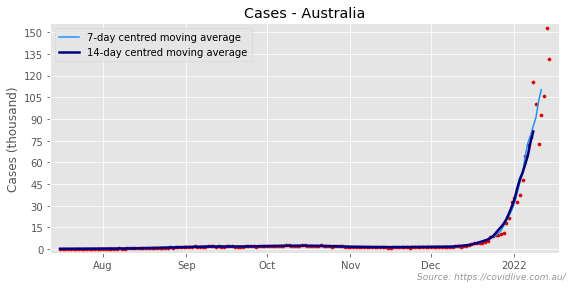

NSW


	to finalise_plot() is not recognised.


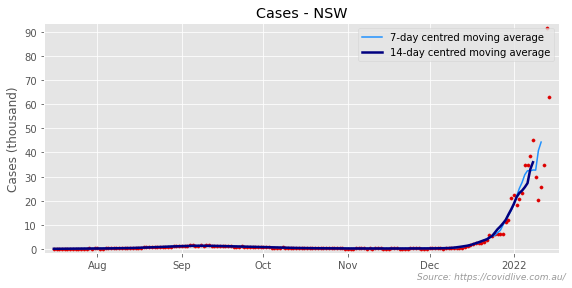

NT


	to finalise_plot() is not recognised.


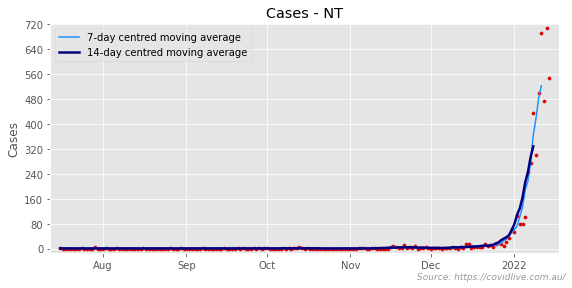

Queensland


	to finalise_plot() is not recognised.


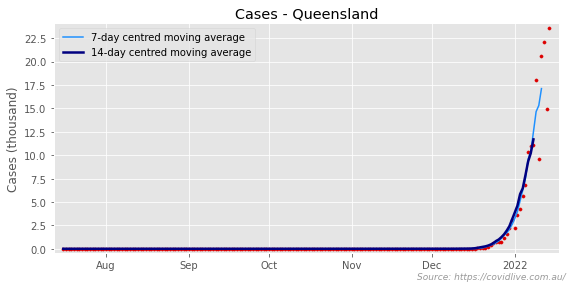

SA


	to finalise_plot() is not recognised.


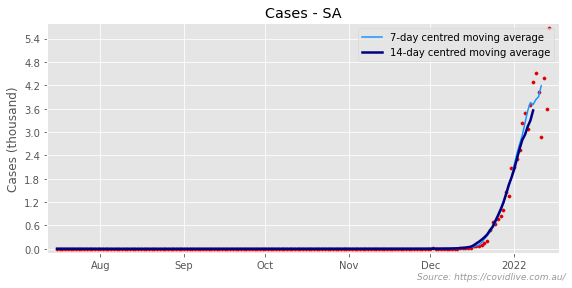

Tasmania


	to finalise_plot() is not recognised.


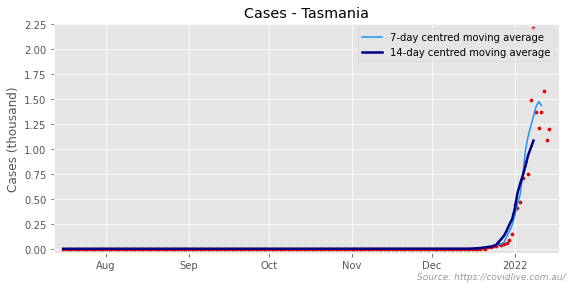

Victoria


	to finalise_plot() is not recognised.


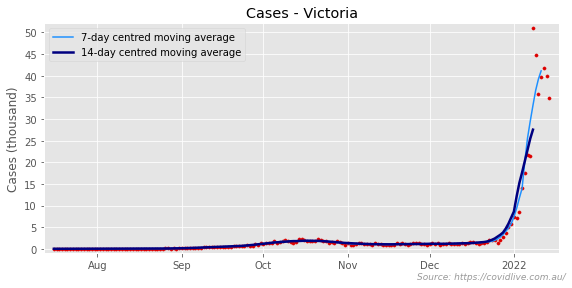

WA


	to finalise_plot() is not recognised.


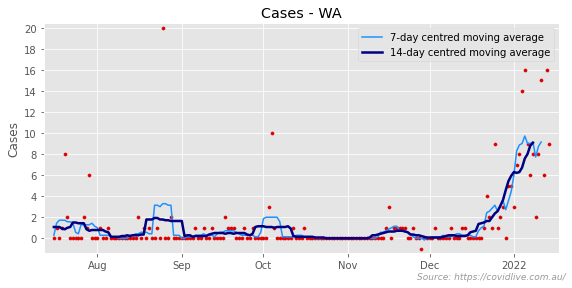

ACT


	to finalise_plot() is not recognised.


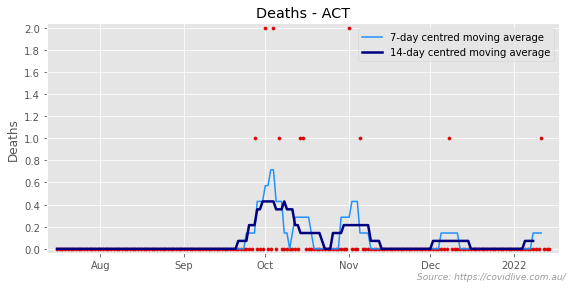

Australia


	to finalise_plot() is not recognised.


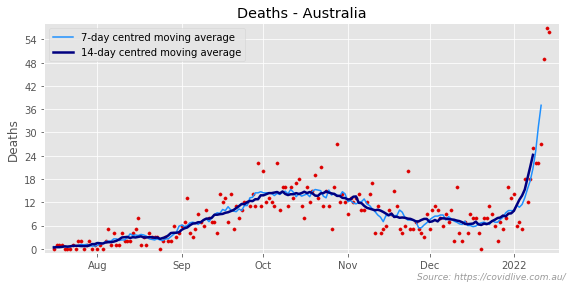

NSW


	to finalise_plot() is not recognised.


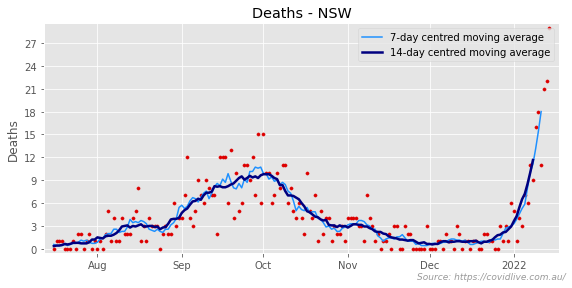

NT


	to finalise_plot() is not recognised.


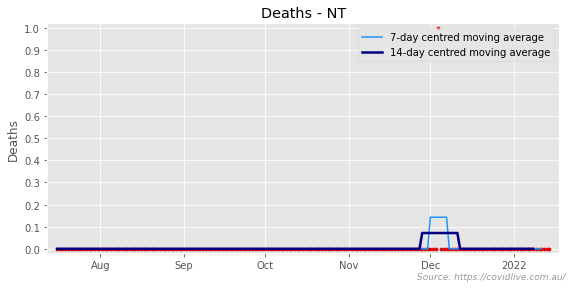

Queensland


	to finalise_plot() is not recognised.


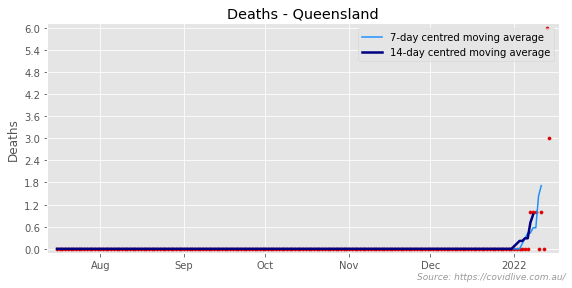

SA


	to finalise_plot() is not recognised.


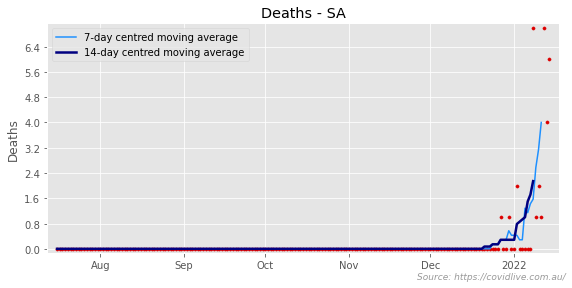

Tasmania
Victoria


	to finalise_plot() is not recognised.


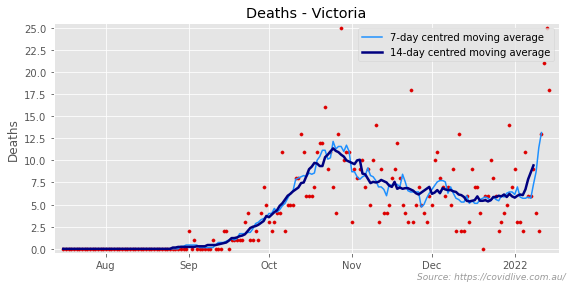

WA
ACT


	to finalise_plot() is not recognised.


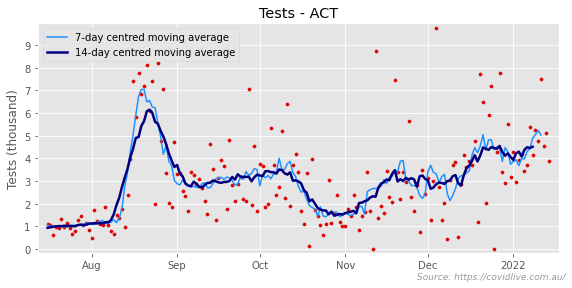

Australia


	to finalise_plot() is not recognised.


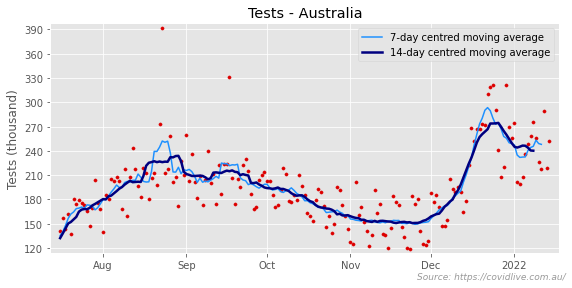

NSW


	to finalise_plot() is not recognised.


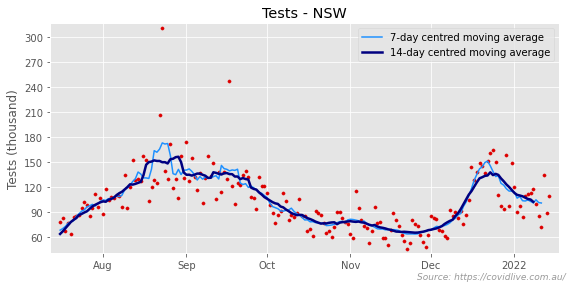

NT


	to finalise_plot() is not recognised.


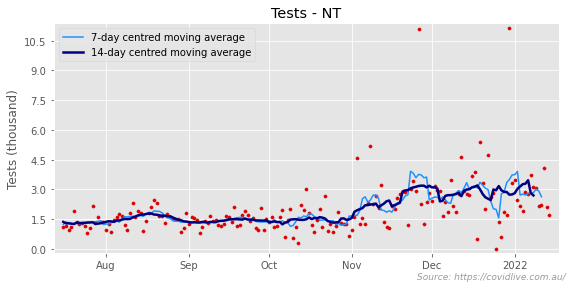

Queensland


	to finalise_plot() is not recognised.


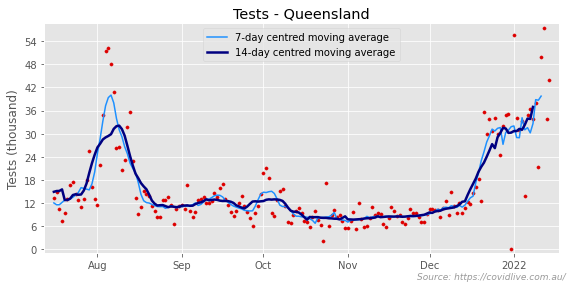

SA


	to finalise_plot() is not recognised.


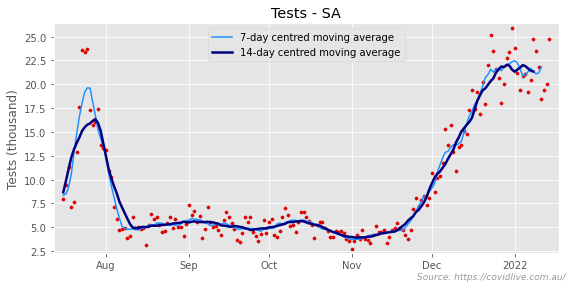

Tasmania


	to finalise_plot() is not recognised.


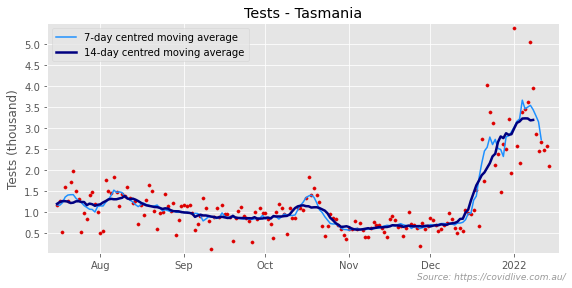

Victoria


	to finalise_plot() is not recognised.


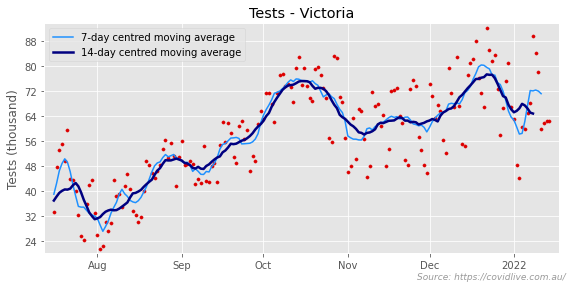

WA


	to finalise_plot() is not recognised.


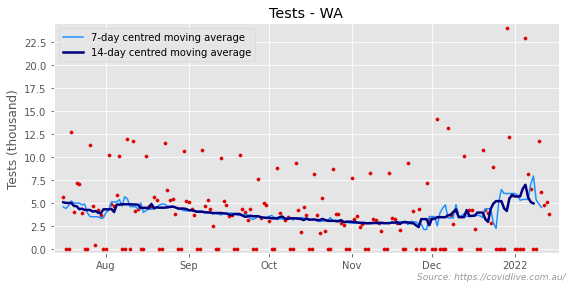

In [25]:
arguments = {
    **std_plot_settings,
    'recent': RECENT,
    'plot_type': 'scatter',
    'scale_y': True,
    'func': plot_series_with_ma,
}

# Let's use raw/uncorrected data for cases
loop_over_frame(daily_u["CASE_CNT"], 'cases', **arguments)

# Let's use negative and outlier corrected data for deaths and tests
loop_over_frame(daily_c["DEATH_CNT"], 'deaths', **arguments)
loop_over_frame(daily_c["TEST_CNT"], 'tests', **arguments)

## Bar Charts - the latest cases, deaths and tests

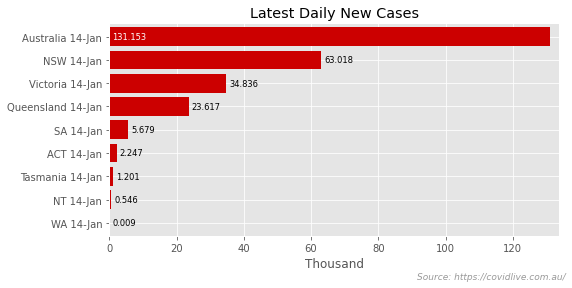

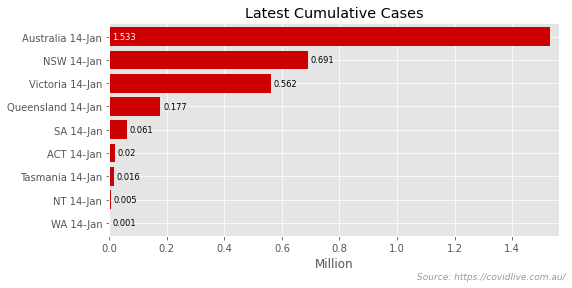

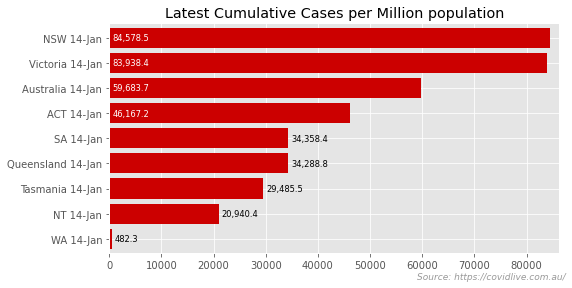

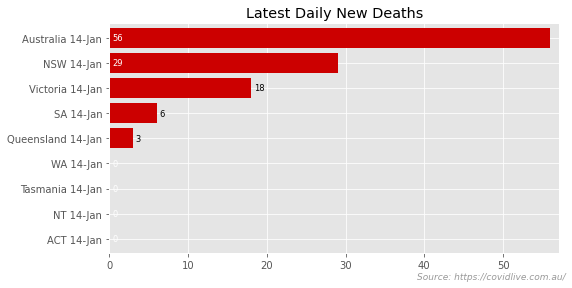

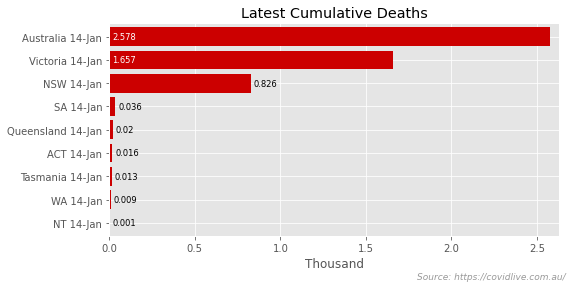

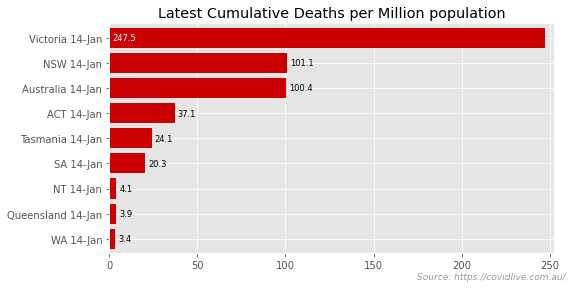

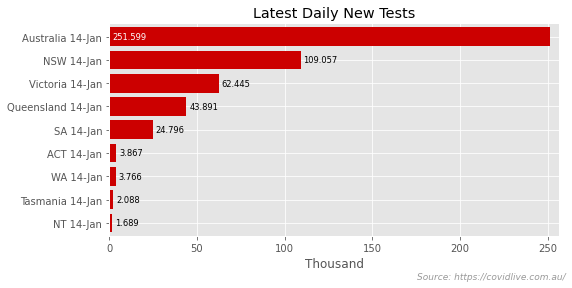

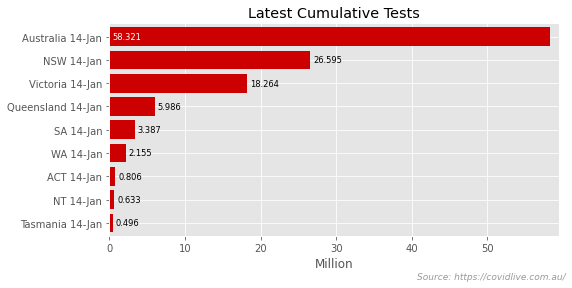

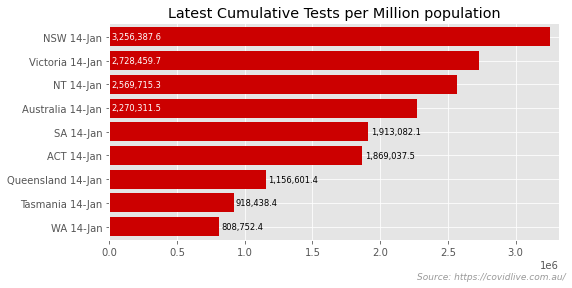

In [26]:
arguments = {
    'color': '#cc0000', 
    **std_plot_settings
}

for item, desc in selected_cols.items():
    # raw counts
    plot_final_barh(daily_u[item], title=f'Latest Daily New {desc.title()}', 
                    force_int=True, scale_x=True, **arguments)
    plot_final_barh(cum_u[item], title=f'Latest Cumulative {desc.title()}', 
                    force_int=True, scale_x=True, round=3, **arguments)

    # Per capit
    per_capita = cum_u[item] / state_pop 
    plot_final_barh(per_capita, 
                    title=f'Latest Cumulative {desc.title()} per Million population', 
                    round=1,
                   **arguments)
    

## Line plots - cases, deaths and tests

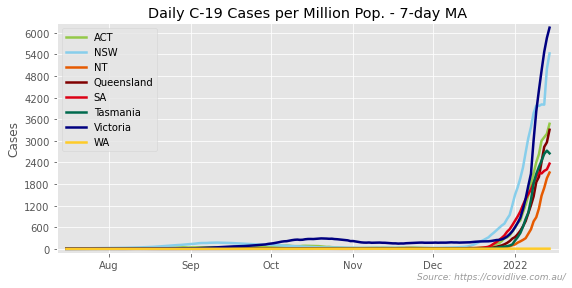

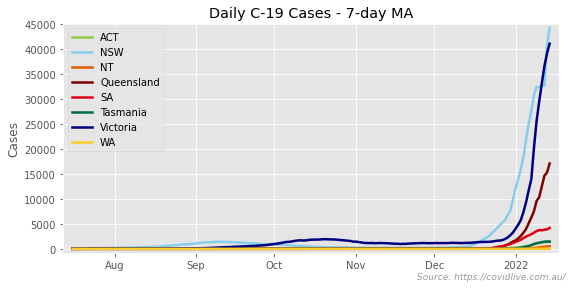

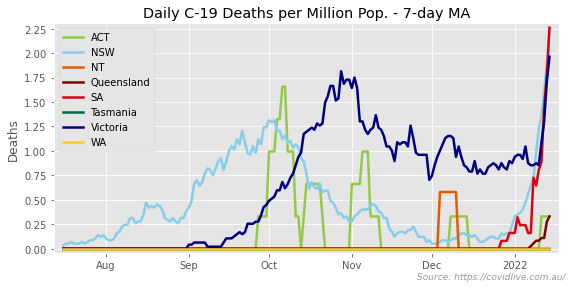

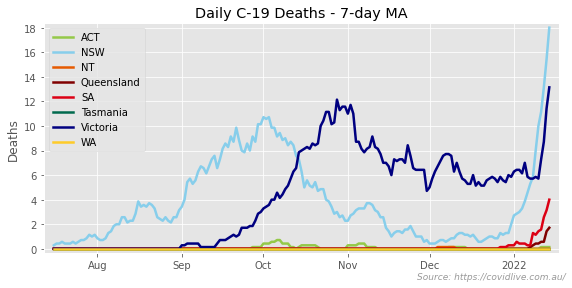

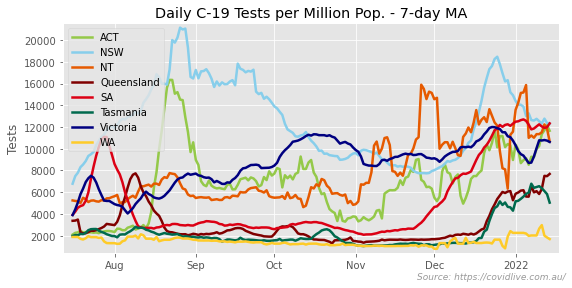

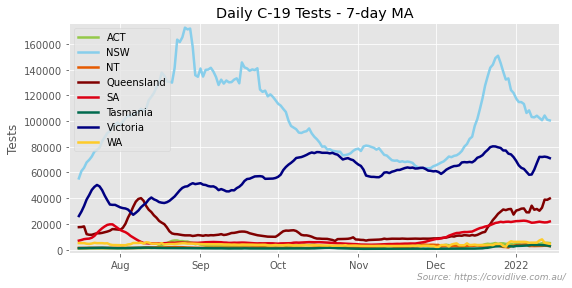

In [27]:
arguments = {
    'color_dict': state_palette,
    'recent': RECENT,
    'lw': 2.5,
    **std_plot_settings,
}

for item, desc in selected_cols.items():
    N = 7
    data = daily_c[item].rolling(N, min_periods=N).mean()

    pcdata = data / state_pop
    if 'Australia' in pcdata.columns: del pcdata['Australia']
    plot_multiline(pcdata, 
                   title=f"Daily C-19 {desc.title()} per Million Pop. - {N}-day MA",
                   ylabel=desc.title(),
                   **arguments
                  )

    if 'Australia' in data.columns: del data['Australia']
    plot_multiline(data, 
                   title=f"Daily C-19 {desc.title()} - {N}-day MA",
                   ylabel=desc.title(),
                   **arguments
                  )

## Active Cases

In [28]:
# capture active items, with nans where data is not up to date
item = "ACTIVE_CNT"
active_all = get_item(item, raw_json_data)
active_all.tail()

We are missing the latest ACTIVE_CNT for Australia, SA
Lastest value less than its predecessor in ACTIVE_CNT for ACT, NSW, Tasmania


NAME            ACT  Australia       NSW      NT  Queensland       SA  \
REPORT_DATE                                                             
2022-01-10   5681.0   590769.0  303795.0  2170.0     80563.0  29489.0   
2022-01-11   6302.0   616394.0  315785.0  2513.0     81581.0  30388.0   
2022-01-12   5601.0   701734.0  333235.0  2725.0    109524.0  32067.0   
2022-01-13   5004.0   739380.0  337818.0  3290.0    130947.0  32516.0   
2022-01-14   4382.0        NaN  336265.0  3300.0    168012.0      NaN   

NAME         Tasmania  Victoria     WA  
REPORT_DATE                             
2022-01-10     7917.0  161065.0   89.0  
2022-01-11     8356.0  171369.0  100.0  
2022-01-12     8764.0  209715.0  103.0  
2022-01-13     7969.0  221726.0  110.0  
2022-01-14     7439.0  239396.0  118.0

### Bar chart of active cases

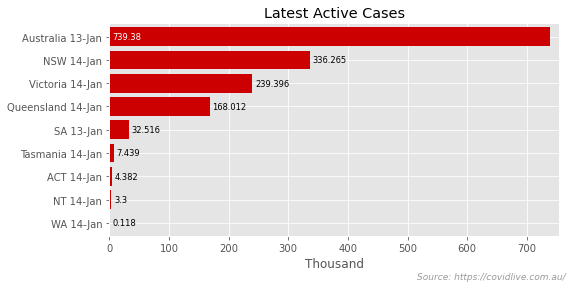

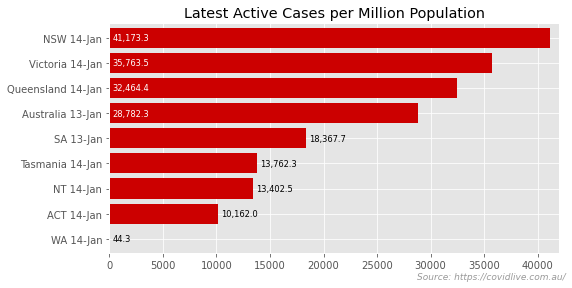

In [29]:
arguments = {
    'color': '#cc0000',
    **std_plot_settings,
}

plot_final_barh(active_all, title=f'Latest Active Cases', 
                force_int=True, scale_x=True,
                **arguments,
               )

plot_final_barh(active_all / state_pop, 
                title=f'Latest Active Cases per Million Population',
                round=1,
                **arguments,)

### Active cases - line plots

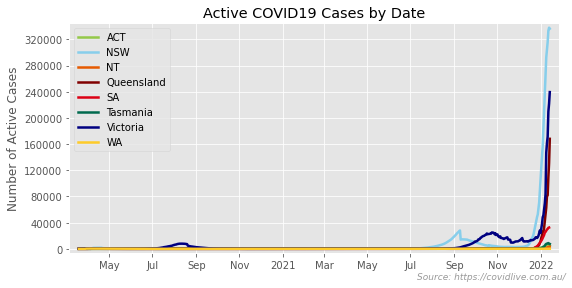

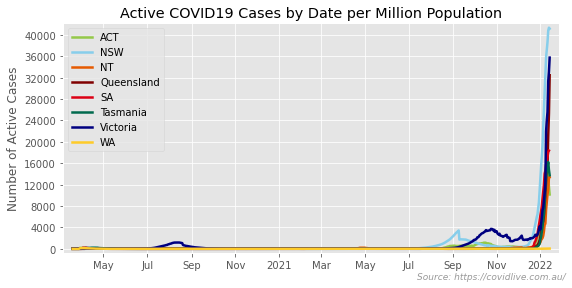

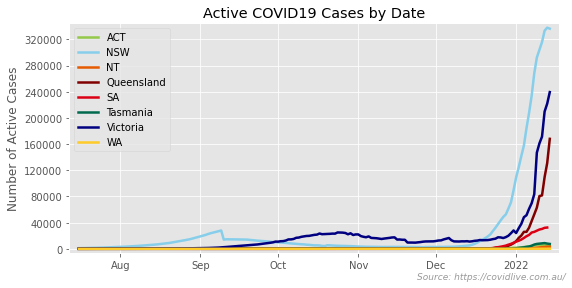

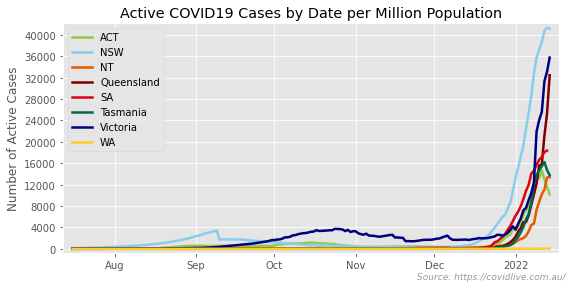

In [30]:
# line plots of trajectories

for recent in 0, RECENT:
    data = active_all.copy()
    title = "Active COVID19 Cases by Date"

    for suffix in '', ' per Million Population':
        if "Australia" in data.columns:
            del data["Australia"]
        title += suffix
        kwargs = {
            'title': title,
            'color_dict': state_palette,
            'ylabel': "Number of Active Cases",
            'save_tag': str(recent),
            'recent': recent,
            'lw': 2.5,
            **std_plot_settings,
        }
        plot_multiline(data, **kwargs)
        data = data / state_pop


## Explore cases to deaths

Currently cannot compare deaths to daily new cases as there is insufficient information to construct rolling death rates. Issues with different disease progression for the different strains.

## Vaccination plots

### Get data

In [31]:
def get_vaxx_data():

    vaxx_items = [
        #"VACC_DOSE_CNT",
        "VACC_PEOPLE_CNT",
        #"VACC_AGED_CARE_CNT",
        #"VACC_GP_CNT",
        #"VACC_FIRST_DOSE_CNT",
        'VACC_BOOSTER_CNT',
    ]
    vaxx_data = {}
    for item in vaxx_items:
        vaxx_data[item] = (
            get_item(item, raw_json_data)
            .pipe(lambda x: x.where(x.diff() != 0, other=np.nan))
            .interpolate(limit_area="inside")
        )
    return vaxx_data

vaxx_data = get_vaxx_data()

### Bar plots

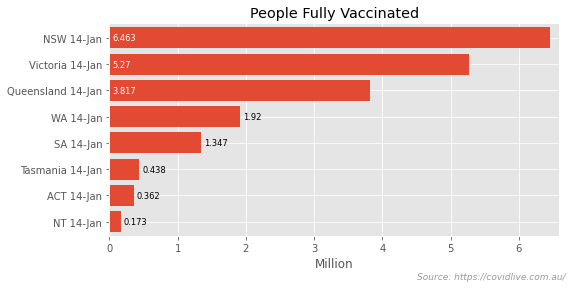

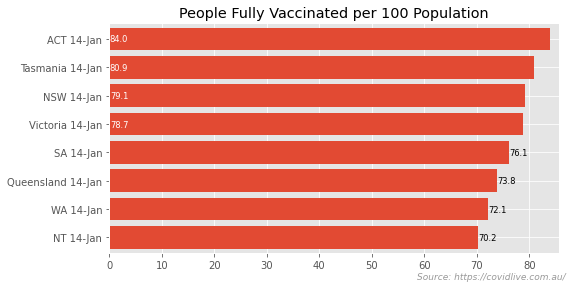

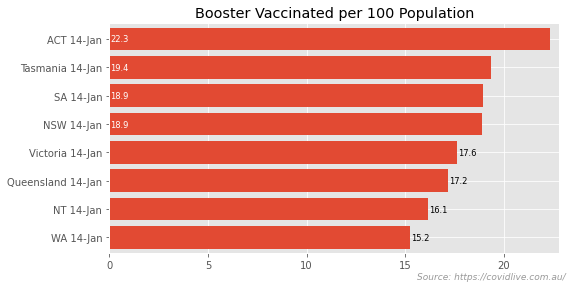

In [32]:
people = vaxx_data['VACC_PEOPLE_CNT'].copy()
people = people.drop('Australia', axis=1)

plot_final_barh(people, title='People Fully Vaccinated', no_locator=True,
                force_int=True, scale_x=True, round=3, **std_plot_settings)

per_capita = people / (state_pop * 10_000)
per_capita = per_capita.drop('Australia', axis=1)
plot_final_barh(per_capita, title='People Fully Vaccinated per 100 Population', 
                no_locator=True, round=1, **std_plot_settings)

boosted = vaxx_data['VACC_BOOSTER_CNT'].copy()
boosted_pc = boosted / (state_pop * 10_000)
boosted_pc = boosted_pc.drop('Australia', axis=1)
plot_final_barh(boosted_pc, title='Booster Vaccinated per 100 Population', 
                no_locator=True, round=1, **std_plot_settings)


### Timeline plots

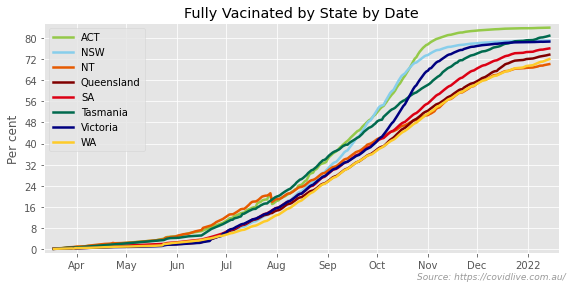

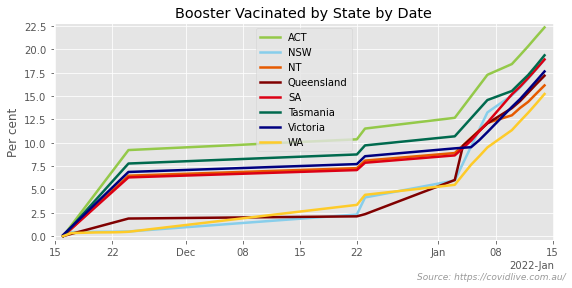

In [33]:
arguments = {
    'color_dict': state_palette,
    'lw': 2.5,
    **std_plot_settings,
}

plot_multiline(per_capita, 
                   title=f"Fully Vacinated by State by Date",
                   ylabel='Per cent',
                   **arguments
                  )

plot_multiline(boosted_pc, 
                   title=f"Booster Vacinated by State by Date",
                   ylabel='Per cent',
                   **arguments
                  )

## Hospitalised

### Get the hospital data

In [43]:
# get data
idents = ["MED_HOSP_CNT", "MED_ICU_CNT", "MED_VENT_CNT"]
descs = ["Hospitalised", "ICU", "Ventilator"]
hospital = {}
for ident, desc in zip(idents, descs):
    data = get_pivot_table(raw_json_data, ident)
    data.index = pd.DatetimeIndex(data.index)
    data = data.dropna(axis=0, how="all")
    hospital[ident] = data

Lastest value less than its predecessor in MED_HOSP_CNT for NT
Lastest value less than its predecessor in MED_ICU_CNT for SA, Tasmania
We are missing the latest MED_VENT_CNT for Australia, NT, Tasmania


In [35]:
# let's look at the in-hospital numbers for the past week
hospital["MED_HOSP_CNT"].tail(7)

NAME          ACT  Australia     NSW    NT  Queensland     SA  Tasmania  \
REPORT_DATE                                                               
2022-01-08   24.0     3105.0  1796.0  17.0       366.0  164.0       7.0   
2022-01-09   27.0     3326.0  1930.0  24.0       402.0  176.0      15.0   
2022-01-10   25.0     3520.0  2029.0  24.0       419.0  188.0      17.0   
2022-01-11   28.0     3869.0  2190.0  32.0       529.0  211.0      18.0   
2022-01-12   23.0     4010.0  2246.0  28.0       555.0  190.0      22.0   
2022-01-13   24.0     4197.0  2383.0  33.0       556.0  225.0      23.0   
2022-01-14   27.0     4414.0  2525.0  27.0       589.0  246.0      24.0   

NAME         Victoria   WA  
REPORT_DATE                 
2022-01-08      731.0  0.0  
2022-01-09      752.0  0.0  
2022-01-10      818.0  0.0  
2022-01-11      861.0  0.0  
2022-01-12      946.0  0.0  
2022-01-13      953.0  0.0  
2022-01-14      976.0  0.0

In [36]:
# let's look at the day-on-day changes for the past week
hospital["MED_HOSP_CNT"].diff().tail(7)

NAME         ACT  Australia    NSW   NT  Queensland    SA  Tasmania  Victoria  \
REPORT_DATE                                                                     
2022-01-08   0.0      206.0   55.0 -2.0        39.0  20.0       7.0      87.0   
2022-01-09   3.0      221.0  134.0  7.0        36.0  12.0       8.0      21.0   
2022-01-10  -2.0      194.0   99.0  0.0        17.0  12.0       2.0      66.0   
2022-01-11   3.0      349.0  161.0  8.0       110.0  23.0       1.0      43.0   
2022-01-12  -5.0      141.0   56.0 -4.0        26.0 -21.0       4.0      85.0   
2022-01-13   1.0      187.0  137.0  5.0         1.0  35.0       1.0       7.0   
2022-01-14   3.0      217.0  142.0 -6.0        33.0  21.0       1.0      23.0   

NAME          WA  
REPORT_DATE       
2022-01-08   0.0  
2022-01-09   0.0  
2022-01-10   0.0  
2022-01-11   0.0  
2022-01-12   0.0  
2022-01-13   0.0  
2022-01-14   0.0

### Recent hospital counts daily

ACT


	to finalise_plot() is not recognised.


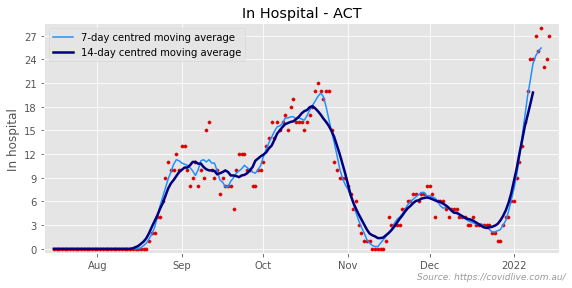

Australia


	to finalise_plot() is not recognised.


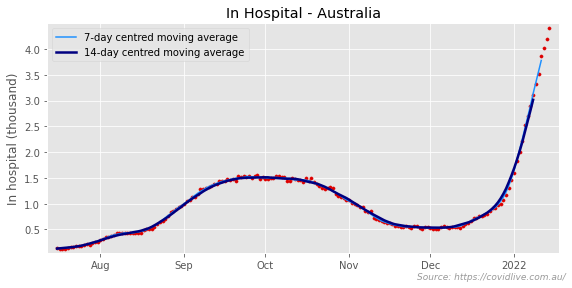

NSW


	to finalise_plot() is not recognised.


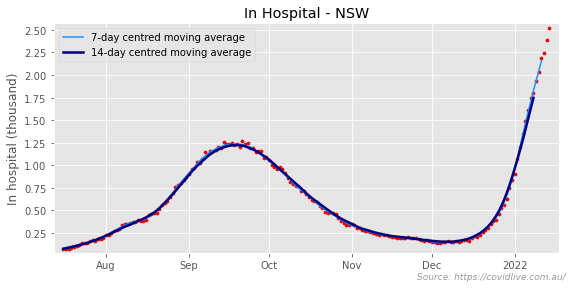

NT


	to finalise_plot() is not recognised.


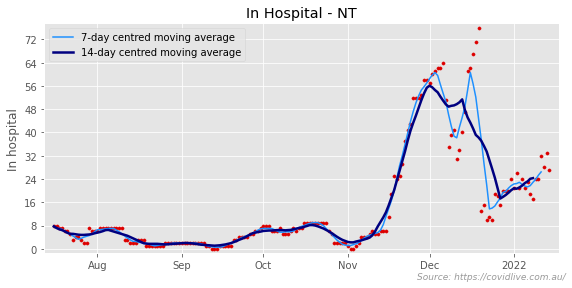

Queensland


	to finalise_plot() is not recognised.


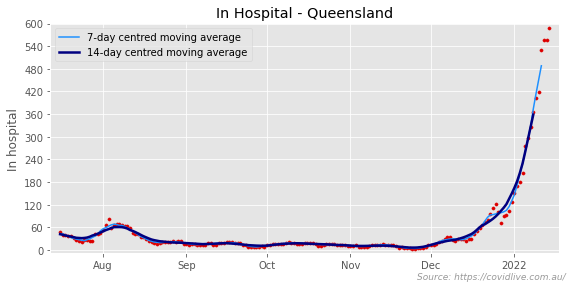

SA


	to finalise_plot() is not recognised.


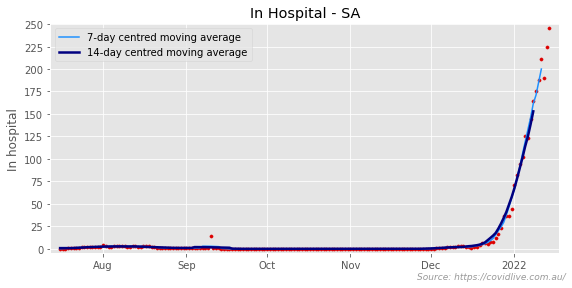

Tasmania


	to finalise_plot() is not recognised.


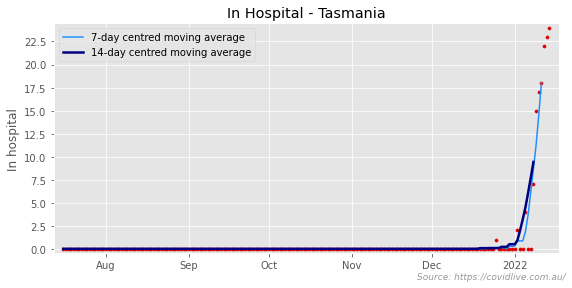

Victoria


	to finalise_plot() is not recognised.


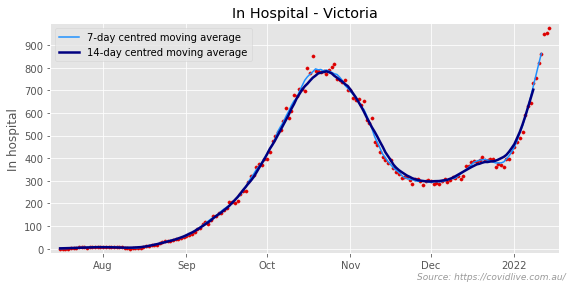

WA


	to finalise_plot() is not recognised.


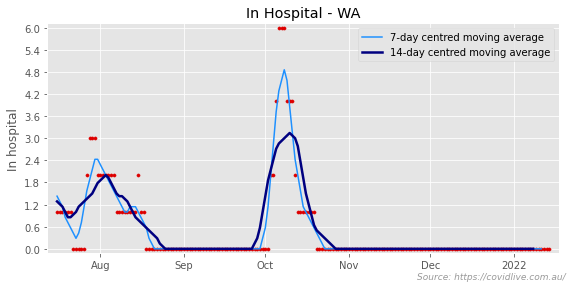

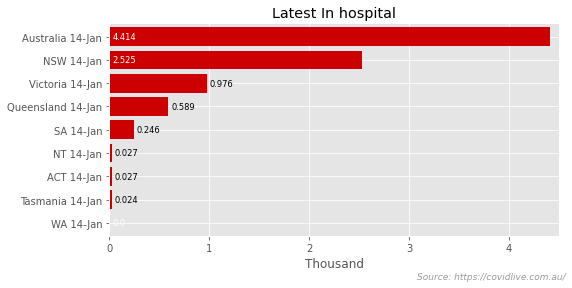

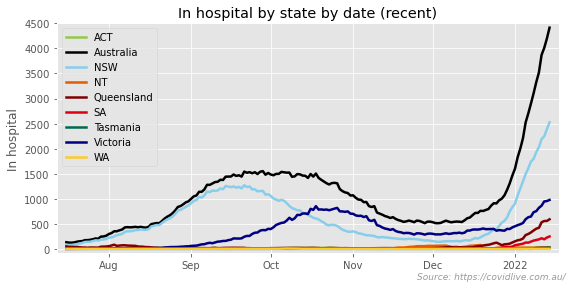

ACT


	to finalise_plot() is not recognised.


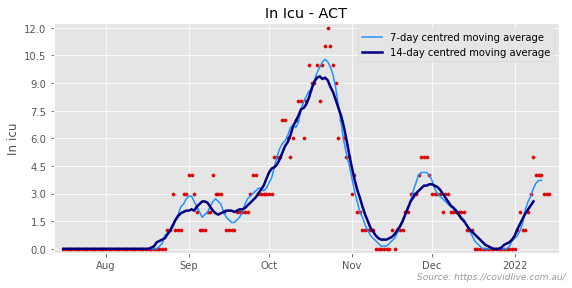

Australia


	to finalise_plot() is not recognised.


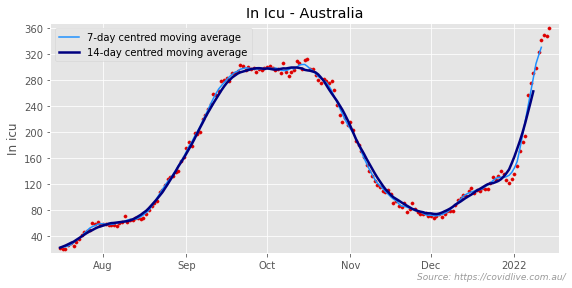

NSW


	to finalise_plot() is not recognised.


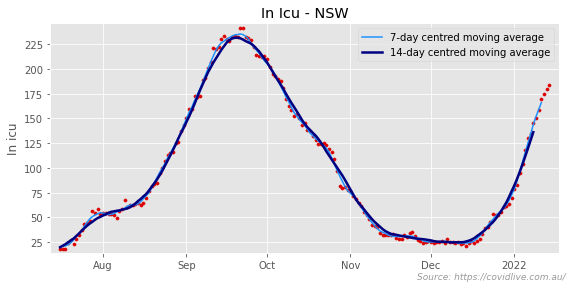

NT


	to finalise_plot() is not recognised.


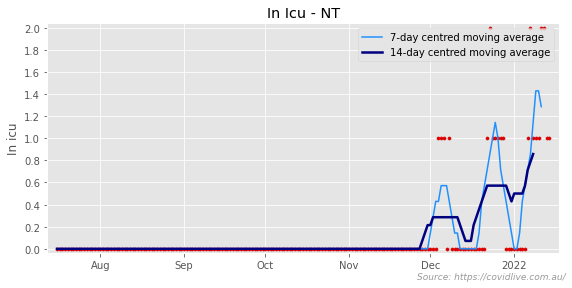

Queensland


	to finalise_plot() is not recognised.


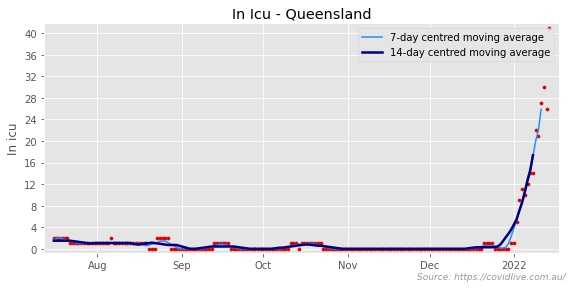

SA


	to finalise_plot() is not recognised.


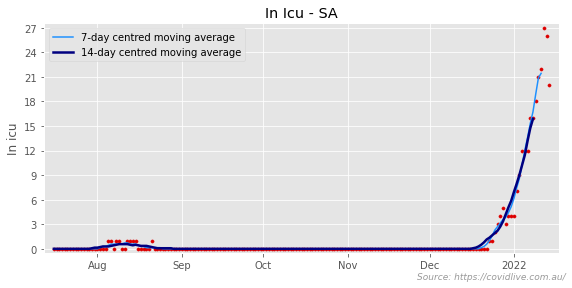

Tasmania


	to finalise_plot() is not recognised.


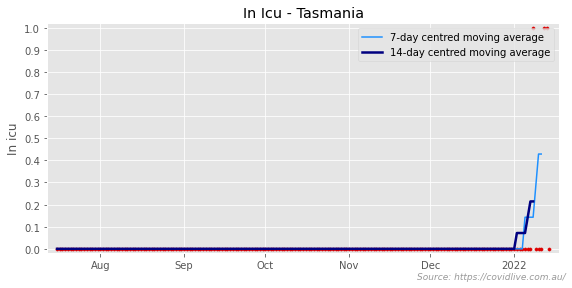

Victoria


	to finalise_plot() is not recognised.


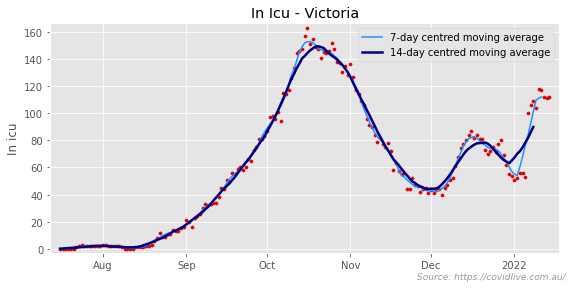

WA


	to finalise_plot() is not recognised.


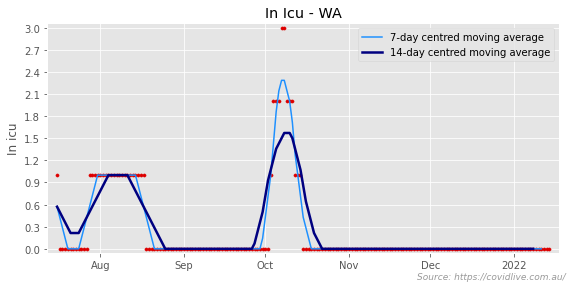

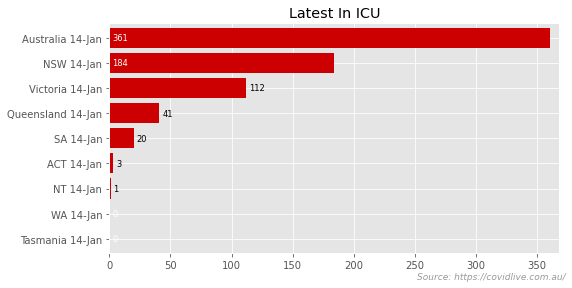

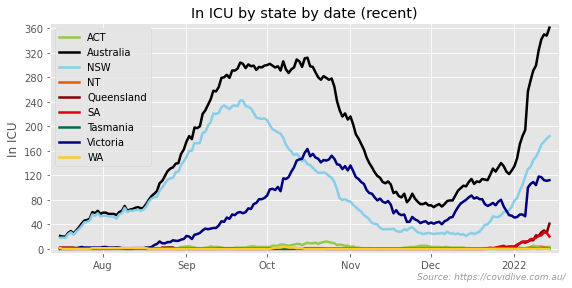

ACT


	to finalise_plot() is not recognised.


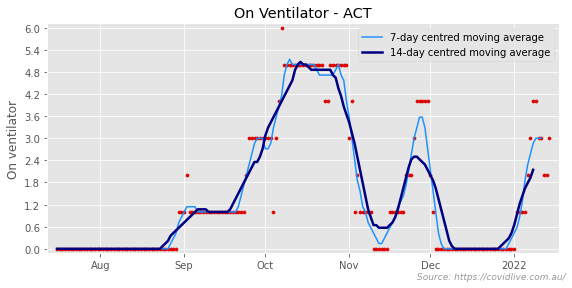

Australia


	to finalise_plot() is not recognised.


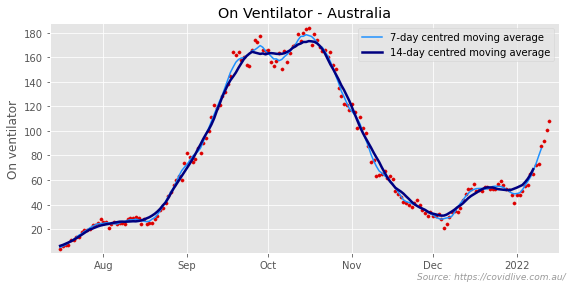

NSW


	to finalise_plot() is not recognised.


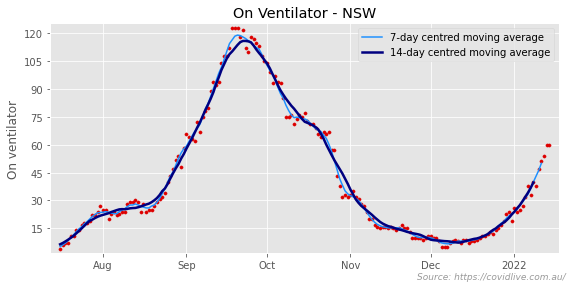

NT


	to finalise_plot() is not recognised.


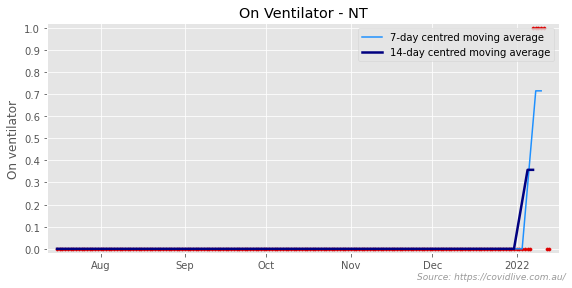

Queensland


	to finalise_plot() is not recognised.


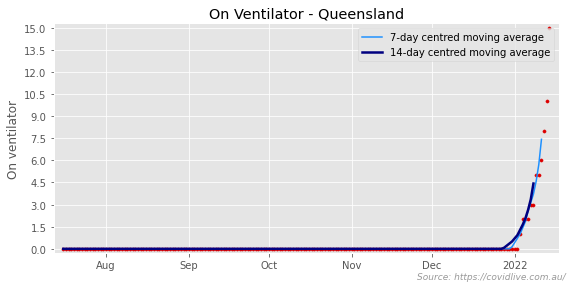

SA


	to finalise_plot() is not recognised.


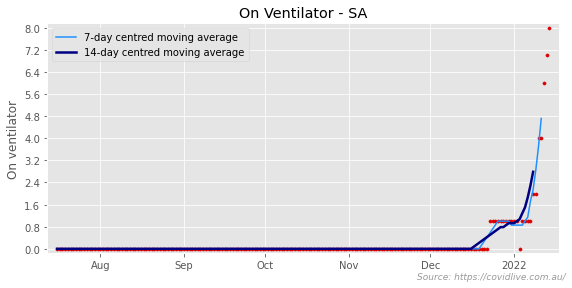

Tasmania
Victoria


	to finalise_plot() is not recognised.


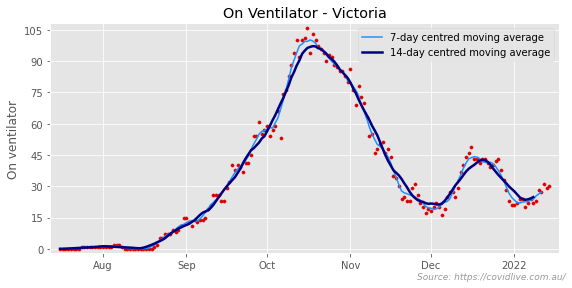

WA


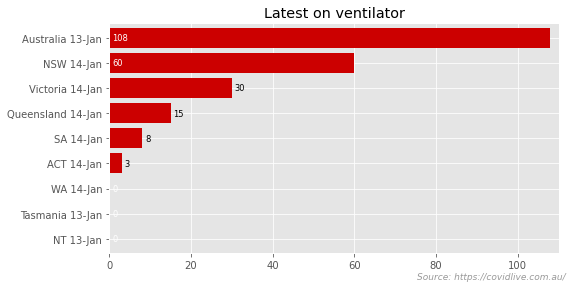

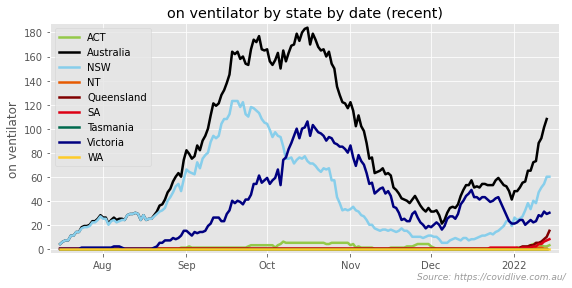

In [37]:
recent_arguments = {
    **std_plot_settings,
    'recent': RECENT,
    'plot_type': 'scatter',
    'scale_y': True,
    'func': plot_series_with_ma,
}

line_arguments = {
    'color_dict': state_palette,
    'recent': RECENT,
    'lw': 2.5,
    **std_plot_settings,
}

hospital_frame = {
    # item, plain-English
    'MED_HOSP_CNT': 'In hospital',
    'MED_ICU_CNT': 'In ICU',
    'MED_VENT_CNT': 'on ventilator',
}

for item, desc in hospital_frame.items():
    loop_over_frame(hospital[item], desc, **recent_arguments)
    plot_final_barh(hospital[item], title=f'Latest {desc}', 
                no_locator=True, force_int=True, scale_x=True,
                    color='#cc0000', **std_plot_settings) 
    plot_multiline(hospital[item], 
                   title=f"{desc} by state by date (recent)",
                   ylabel=desc,
                   **line_arguments
                  )
    
    

### Progression

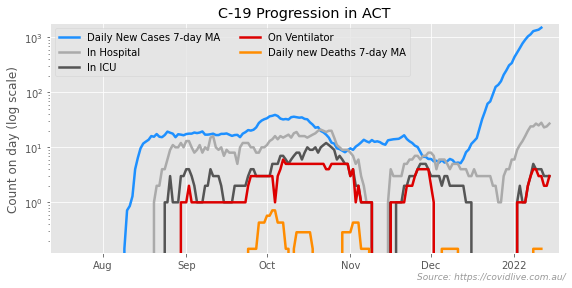

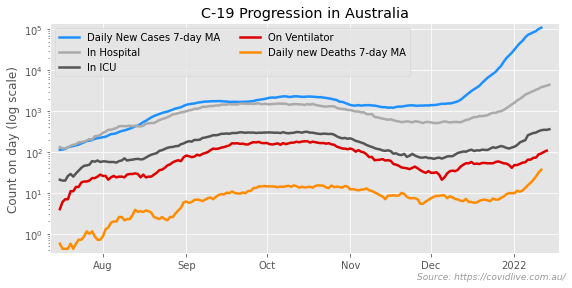

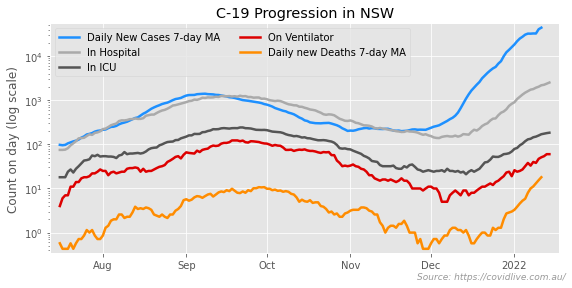

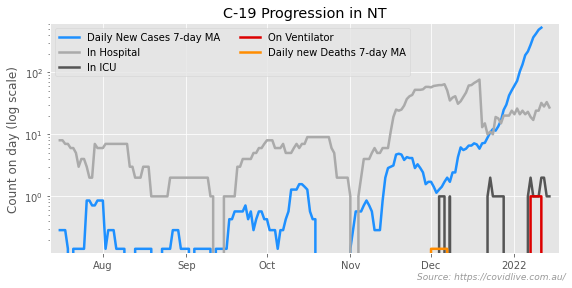

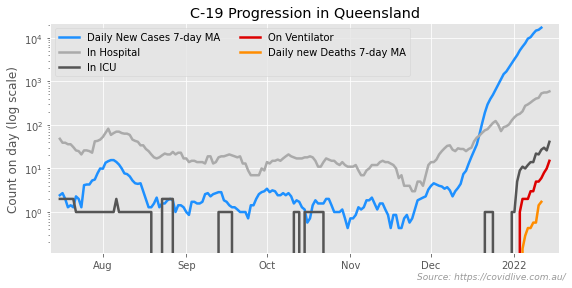

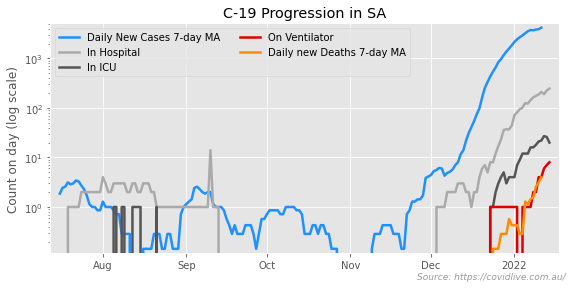

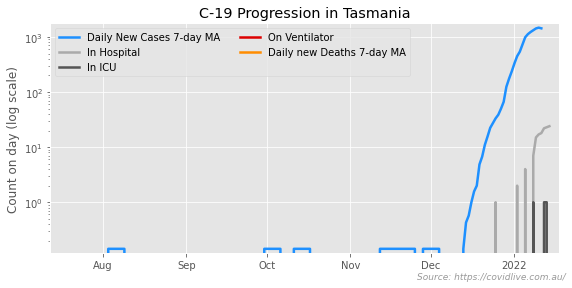

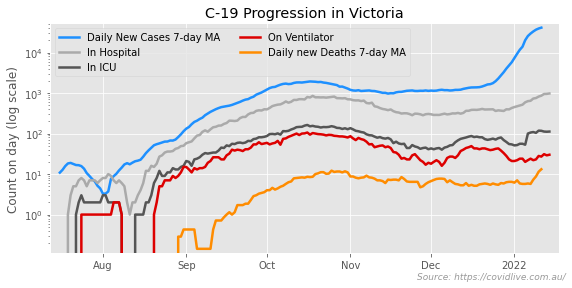

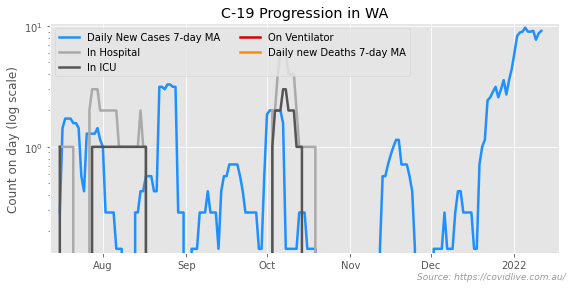

In [63]:
N_CASES_ROLL = 7
M_DEATHS_ROLL = 7
cases = daily_u['CASE_CNT'].rolling(N_CASES_ROLL, center=True).mean()
deaths = daily_u['DEATH_CNT'].rolling(M_DEATHS_ROLL, center=True).mean()
hospital_ = hospital['MED_HOSP_CNT']
icu = hospital['MED_ICU_CNT']
vent = hospital['MED_VENT_CNT']

progress_frame = [
    (cases, f'Daily New Cases {N_CASES_ROLL}-day MA'),
    (hospital_, 'In Hospital'),
    (icu, 'In ICU'),
    (vent, 'On Ventilator'),
    (deaths, f'Daily new Deaths {M_DEATHS_ROLL}-day MA'),
]

colors = ["dodgerblue", "#aaaaaa", "#555555", "#dd0000", "darkorange"]
cdict = {v: colors[i] for i, (_, v) in enumerate(progress_frame)}
line_arguments = {
    'color_dict': cdict,
    'recent': RECENT,
    'lw': 2.5,
    'yscale': 'log',
    'legend_ncol': 2,
    **std_plot_settings,
}


for state in cases.columns:
    combined = {}
    for (data, label) in progress_frame:
        combined[label] = data[state]
    df = pd.DataFrame(combined)
    plot_multiline(df, 
                   title=f"C-19 Progression in {state}",
                   ylabel='Count on day (log scale)',
                   **line_arguments
                  )
    

## Source of infection

### Extraction

In [64]:
Australia = "Australia"
soi_names = {
    "SRC_OVERSEAS_CNT": "Overseas",
    "SRC_INTERSTATE_CNT": "Interstate",
    "SRC_CONTACT_CNT": "Known contact",
    "SRC_UNKNOWN_CNT": "Unknown contact",
    "SRC_INVES_CNT": "Investigating",
}
# check we have all possible sources ...
assert (raw_json_data.columns.str[:3] == "SRC").sum() == len(soi_names)

In [65]:
def extract_soi(raw_json_data):

    # construct data for sources of infection
    soi_tables = {}
    for item in soi_names.keys():
        table = get_item(item, raw_json_data)
        if Australia in table.columns:
            del table[Australia]
        soi_tables[soi_names[item]] = table

    state_soi_tables = {}
    for state in state_pop.keys():
        if state == Australia:
            continue
        table = pd.DataFrame()
        for item in soi_names.keys():
            table[soi_names[item]] = soi_tables[soi_names[item]][state]
        state_soi_tables[state] = table.dropna()

    soi_national = {}
    for key in soi_tables.keys():
        soi_national[key] = soi_tables[key].sum(axis=1)
    soi_national = pd.DataFrame(soi_national)
    if soi_national.iloc[-1].sum() < soi_national.iloc[-2].sum():
        # last cumulative row incomplete
        soi_national = soi_national[:-1]

    return soi_tables, state_soi_tables, soi_national

In [66]:
soi_tables, state_soi_tables, soi_national = extract_soi(raw_json_data)

Lastest value less than its predecessor in SRC_OVERSEAS_CNT for NT
We are missing the latest SRC_INTERSTATE_CNT for ACT, Australia, NSW, NT, Queensland, SA, Tasmania, Victoria
Lastest value less than its predecessor in SRC_CONTACT_CNT for SA
Lastest value less than its predecessor in SRC_UNKNOWN_CNT for Australia, SA, Victoria
We are missing the latest SRC_INVES_CNT for Australia, NSW, NT, Queensland, SA, Tasmania, WA


### Check latest raw SOI data against raw case count data

In [67]:
# WARN if penultimate and final SOI
# totals do not match CASE_CNT table


def check_SOI():
    FINALITY = 3

    soi_cases = {name: x.sum(axis=1) for name, x in state_soi_tables.items()}
    soi_cases = pd.DataFrame(soi_cases)
    cases = cum_u["CASE_CNT"][soi_cases.columns]  # ensure column order

    for check in (-1, -2):
        case_row = cases.diff().iloc[check]
        soi_row = soi_cases.diff().iloc[check]
        problematic = (case_row != soi_row) & soi_row.notna() & case_row.notna()
        if problematic.any():
            warn(
                f'CASE_CNT mismatch - check the {"second " if check == -2 else ""}'
                "last line of the SOI tables for "
                f"{problematic[problematic].index.values}"
            )

            print("Latest cases data:")
            display(cases.diff().tail(FINALITY))
            print("Latest source of infection data:")
            display(soi_cases.diff().tail(FINALITY))

            print("=" * 50)
            problematic = problematic[problematic]
            for i, p in problematic.iteritems():
                print(i)
                display(state_soi_tables[i].tail(FINALITY))
                print("-" * 50)


check_SOI()

CASE_CNT mismatch - check the last line of the SOI tables for ['NSW' 'Victoria' 'Queensland' 'SA' 'WA' 'Tasmania' 'NT' 'ACT']
Latest cases data:


NAME             NSW  Victoria  Queensland      SA    WA  Tasmania     NT  \
REPORT_DATE                                                                 
2022-01-12   34636.0   41819.0     22061.0  4377.0   6.0    1579.0  473.0   
2022-01-13   91715.0   39814.0     14897.0  3578.0  16.0    1092.0  708.0   
2022-01-14   63018.0   34836.0     23617.0  5679.0   9.0    1201.0  546.0   

NAME            ACT  
REPORT_DATE          
2022-01-12   1052.0  
2022-01-13   1303.0  
2022-01-14   2247.0

Latest source of infection data:


NSW  Victoria  Queensland      SA    WA  Tasmania     NT  \
REPORT_DATE                                                                 
2022-01-11   25658.0   21107.0     16367.0  2877.0  15.0     352.0  389.0   
2022-01-12   34636.0   23385.0     18076.0  3640.0   6.0     732.0  318.0   
2022-01-13   30328.0   22971.0     12085.0  3578.0  16.0     245.0  494.0   

                ACT  
REPORT_DATE          
2022-01-11   2058.0  
2022-01-12   1052.0  
2022-01-13   1303.0

NSW


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-01-11     4222.0       692.0       124142.0              0.0   
2022-01-12     4226.0       723.0       125907.0              0.0   
2022-01-13     4230.0       758.0       127528.0              0.0   

             Investigating  
REPORT_DATE                 
2022-01-11        372333.0  
2022-01-12        405169.0  
2022-01-13        433837.0

--------------------------------------------------
Victoria


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-01-11     1606.0         0.0       123299.0           5324.0   
2022-01-12     1606.0         0.0       128372.0         254638.0   
2022-01-13     1606.0         0.0       134549.0           5337.0   

             Investigating  
REPORT_DATE                 
2022-01-11        231002.0  
2022-01-12             0.0  
2022-01-13        266095.0

--------------------------------------------------
Queensland


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-01-11     1595.0       331.0         1875.0           1262.0   
2022-01-12     1595.0       332.0         1917.0           1332.0   
2022-01-13     1595.0       332.0         1985.0           1432.0   

             Investigating  
REPORT_DATE                 
2022-01-11         99596.0  
2022-01-12        117559.0  
2022-01-13        129476.0

--------------------------------------------------
SA


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-01-11      811.0      2394.0        18027.0          10965.0   
2022-01-12      821.0      2575.0        19366.0          12110.0   
2022-01-13      821.0      2578.0        19351.0          12100.0   

             Investigating  
REPORT_DATE                 
2022-01-11         14993.0  
2022-01-12         15958.0  
2022-01-13         19558.0

--------------------------------------------------
WA


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-01-11     1045.0        71.0          122.0             16.0   
2022-01-12     1046.0        74.0          123.0             16.0   
2022-01-13     1049.0        85.0          125.0             16.0   

             Investigating  
REPORT_DATE                 
2022-01-11             0.0  
2022-01-12             1.0  
2022-01-13             1.0

--------------------------------------------------
Tasmania


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-01-11      106.0       257.0          531.0            251.0   
2022-01-12      106.0       261.0          544.0            267.0   
2022-01-13      106.0       263.0          553.0            276.0   

             Investigating  
REPORT_DATE                 
2022-01-11          7105.0  
2022-01-12          7804.0  
2022-01-13          8029.0

--------------------------------------------------
NT


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-01-11      258.0       842.0          581.0            636.0   
2022-01-12      258.0       852.0          591.0            649.0   
2022-01-13      257.0       868.0          598.0            662.0   

             Investigating  
REPORT_DATE                 
2022-01-11           697.0  
2022-01-12           982.0  
2022-01-13          1441.0

--------------------------------------------------
ACT


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-01-11        0.0         0.0        15306.0              0.0   
2022-01-12        0.0         0.0        16358.0              0.0   
2022-01-13        0.0         0.0        17661.0              0.0   

             Investigating  
REPORT_DATE                 
2022-01-11             0.0  
2022-01-12             0.0  
2022-01-13             0.0

--------------------------------------------------
CASE_CNT mismatch - check the second last line of the SOI tables for ['NSW' 'Victoria' 'Queensland' 'SA' 'WA' 'Tasmania' 'NT' 'ACT']
Latest cases data:


NAME             NSW  Victoria  Queensland      SA    WA  Tasmania     NT  \
REPORT_DATE                                                                 
2022-01-12   34636.0   41819.0     22061.0  4377.0   6.0    1579.0  473.0   
2022-01-13   91715.0   39814.0     14897.0  3578.0  16.0    1092.0  708.0   
2022-01-14   63018.0   34836.0     23617.0  5679.0   9.0    1201.0  546.0   

NAME            ACT  
REPORT_DATE          
2022-01-12   1052.0  
2022-01-13   1303.0  
2022-01-14   2247.0

Latest source of infection data:


NSW  Victoria  Queensland      SA    WA  Tasmania     NT  \
REPORT_DATE                                                                 
2022-01-11   25658.0   21107.0     16367.0  2877.0  15.0     352.0  389.0   
2022-01-12   34636.0   23385.0     18076.0  3640.0   6.0     732.0  318.0   
2022-01-13   30328.0   22971.0     12085.0  3578.0  16.0     245.0  494.0   

                ACT  
REPORT_DATE          
2022-01-11   2058.0  
2022-01-12   1052.0  
2022-01-13   1303.0

NSW


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-01-11     4222.0       692.0       124142.0              0.0   
2022-01-12     4226.0       723.0       125907.0              0.0   
2022-01-13     4230.0       758.0       127528.0              0.0   

             Investigating  
REPORT_DATE                 
2022-01-11        372333.0  
2022-01-12        405169.0  
2022-01-13        433837.0

--------------------------------------------------
Victoria


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-01-11     1606.0         0.0       123299.0           5324.0   
2022-01-12     1606.0         0.0       128372.0         254638.0   
2022-01-13     1606.0         0.0       134549.0           5337.0   

             Investigating  
REPORT_DATE                 
2022-01-11        231002.0  
2022-01-12             0.0  
2022-01-13        266095.0

--------------------------------------------------
Queensland


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-01-11     1595.0       331.0         1875.0           1262.0   
2022-01-12     1595.0       332.0         1917.0           1332.0   
2022-01-13     1595.0       332.0         1985.0           1432.0   

             Investigating  
REPORT_DATE                 
2022-01-11         99596.0  
2022-01-12        117559.0  
2022-01-13        129476.0

--------------------------------------------------
SA


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-01-11      811.0      2394.0        18027.0          10965.0   
2022-01-12      821.0      2575.0        19366.0          12110.0   
2022-01-13      821.0      2578.0        19351.0          12100.0   

             Investigating  
REPORT_DATE                 
2022-01-11         14993.0  
2022-01-12         15958.0  
2022-01-13         19558.0

--------------------------------------------------
WA


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-01-11     1045.0        71.0          122.0             16.0   
2022-01-12     1046.0        74.0          123.0             16.0   
2022-01-13     1049.0        85.0          125.0             16.0   

             Investigating  
REPORT_DATE                 
2022-01-11             0.0  
2022-01-12             1.0  
2022-01-13             1.0

--------------------------------------------------
Tasmania


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-01-11      106.0       257.0          531.0            251.0   
2022-01-12      106.0       261.0          544.0            267.0   
2022-01-13      106.0       263.0          553.0            276.0   

             Investigating  
REPORT_DATE                 
2022-01-11          7105.0  
2022-01-12          7804.0  
2022-01-13          8029.0

--------------------------------------------------
NT


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-01-11      258.0       842.0          581.0            636.0   
2022-01-12      258.0       852.0          591.0            649.0   
2022-01-13      257.0       868.0          598.0            662.0   

             Investigating  
REPORT_DATE                 
2022-01-11           697.0  
2022-01-12           982.0  
2022-01-13          1441.0

--------------------------------------------------
ACT


Overseas  Interstate  Known contact  Unknown contact  \
REPORT_DATE                                                         
2022-01-11        0.0         0.0        15306.0              0.0   
2022-01-12        0.0         0.0        16358.0              0.0   
2022-01-13        0.0         0.0        17661.0              0.0   

             Investigating  
REPORT_DATE                 
2022-01-11             0.0  
2022-01-12             0.0  
2022-01-13             0.0

--------------------------------------------------


## Local cases/transmission

### Create dataframe for local transmission

Note: the overseas source of infection data can be substantially delayed (up to 24 hours) on the total new cases in Australia (from all sources). Consequently, Australian transmission data can be delayed. 

In [79]:
raw_cum_au_trans = (
    (cum_u['CASE_CNT'] - soi_tables['Overseas'])
    .drop('Australia', axis=1)
    .dropna(how='all', axis=0)
)
    
raw_cum_au_trans.tail()

NAME             ACT       NSW      NT  Queensland       SA  Tasmania  \
REPORT_DATE                                                             
2022-01-09   12176.0  451313.0  1991.0     85166.0  39509.0    9387.0   
2022-01-10   13248.0  471512.0  2487.0     94731.0  43515.0   10593.0   
2022-01-11   15306.0  497167.0  3171.0    115284.0  46379.0   11960.0   
2022-01-12   16358.0  531799.0  3644.0    137345.0  50746.0   13539.0   
2022-01-13   17661.0  623510.0  4353.0    152242.0  54324.0   14631.0   

NAME         Victoria     WA  
REPORT_DATE                   
2022-01-09   368343.0  188.0  
2022-01-10   404187.0  195.0  
2022-01-11   443797.0  209.0  
2022-01-12   485616.0  214.0  
2022-01-13   525430.0  227.0

In [78]:
LOCAL = 'LOCAL'       
cum_u[LOCAL] = raw_cum_au_trans
daily_u[LOCAL], daily_c[LOCAL], cum_c[LOCAL] = (
    ps.dataframe_correction(cum_u[LOCAL], verbose=False)
)

### And plot

ACT


	to finalise_plot() is not recognised.


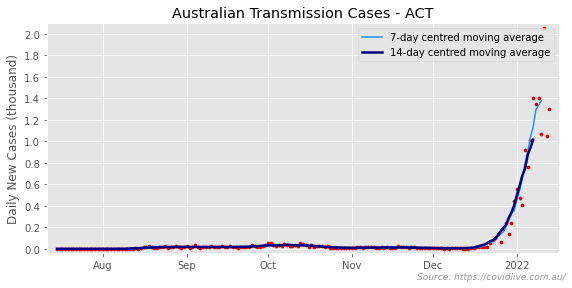

NSW


	to finalise_plot() is not recognised.


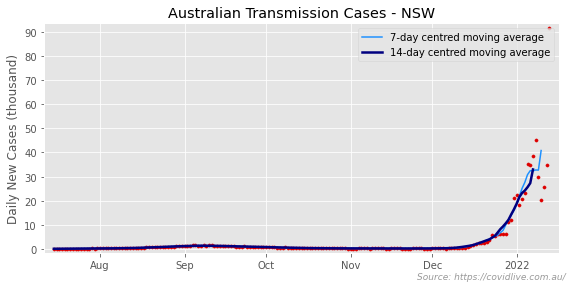

NT


	to finalise_plot() is not recognised.


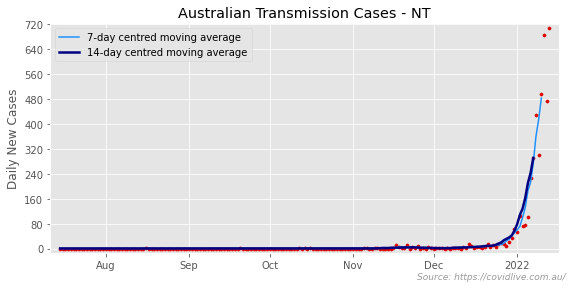

Queensland


	to finalise_plot() is not recognised.


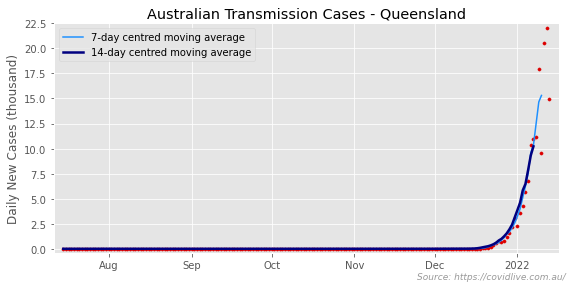

SA


	to finalise_plot() is not recognised.


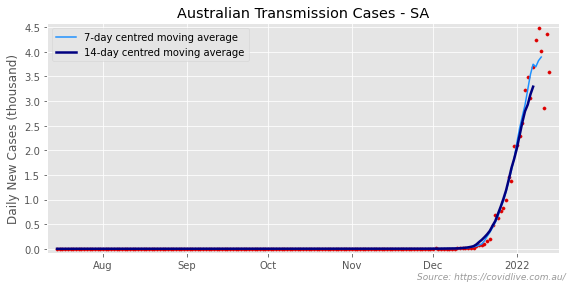

Tasmania


	to finalise_plot() is not recognised.


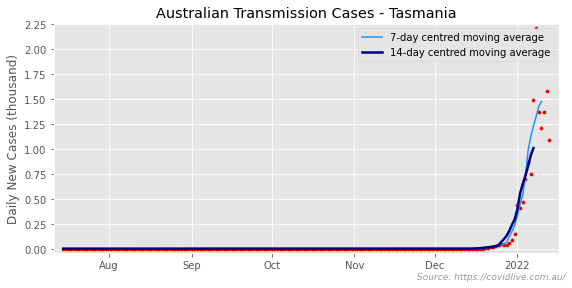

Victoria


	to finalise_plot() is not recognised.


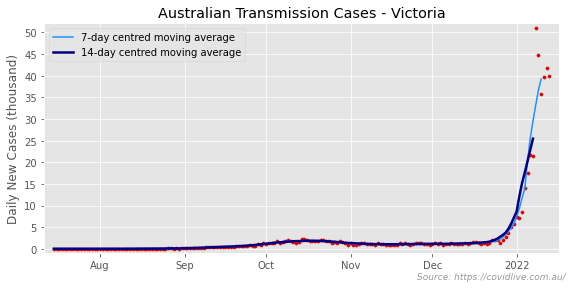

WA


	to finalise_plot() is not recognised.


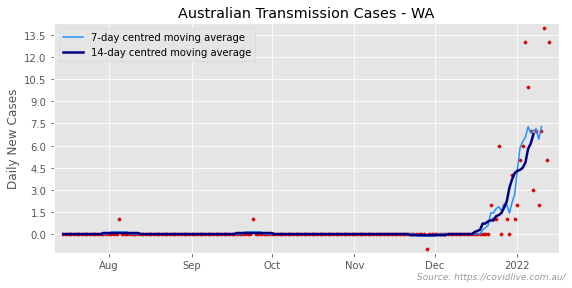

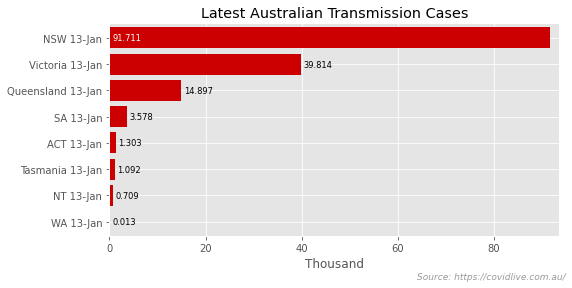

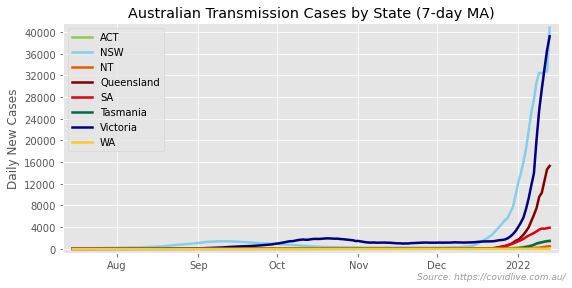

In [170]:
recent_arguments = {
    **std_plot_settings,
    'recent': RECENT,
    'plot_type': 'scatter',
    'scale_y': True,
    'func': plot_series_with_ma,
}

line_arguments = {
    'color_dict': state_palette,
    'recent': RECENT,
    'lw': 2.5,
    **std_plot_settings,
}

loop_over_frame(daily_u[LOCAL], 'Australian Transmission Cases', 
                ylabel='Daily New Cases', **recent_arguments)
plot_final_barh(daily_u[LOCAL], title=f'Latest Australian Transmission Cases', 
                no_locator=True, force_int=True, scale_x=True,
                    color='#cc0000', **std_plot_settings) 
N = 7
plot_multiline(daily_u[LOCAL].rolling(7).mean(), 
                   title=f"Australian Transmission Cases by State ({N}-day MA)",
                   ylabel='Daily New Cases',
                   **line_arguments
                  )

## Outbreak Growth Factors

### New cases - daily growth rate

In [165]:
def daily_growth_rate(series, **kwargs):
    PERIOD = 7
    THRESHOLD = 10 # cases per day on average
    series = series.rolling(PERIOD, center=True).mean()
    series = series.where(series > THRESHOLD, other=np.nan) # ignore small data
    k = np.log(series / series.shift(PERIOD)) / PERIOD  * 100 # daily growth rate %
    if k.isna().all():
        return None
    
    fig, ax = plt.subplots()
    line(ax, k, kwargs)
    ax.axhline(0, color='#999999', lw=0.5)
    kwargs['lfooter'] = (
        f'When daily new cases > {THRESHOLD}; '
        f'Australian transmission, a {PERIOD}-day MA, and growth over {PERIOD}-days.'
    )
    ps.finalise_plot(ax, **kwargs)
    return None

ACT


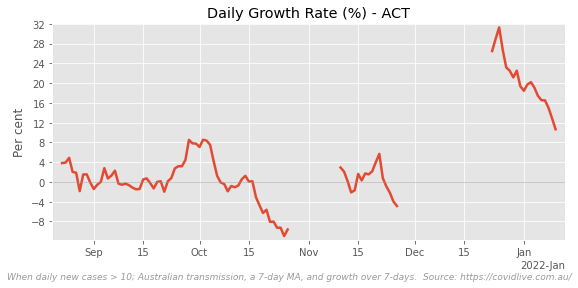

NSW


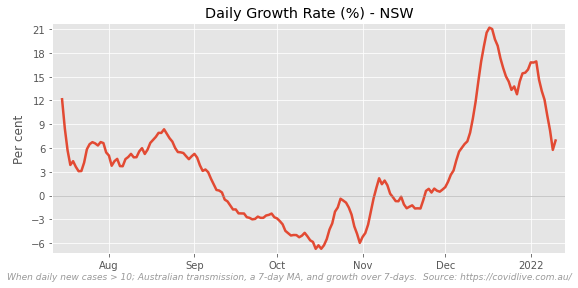

NT


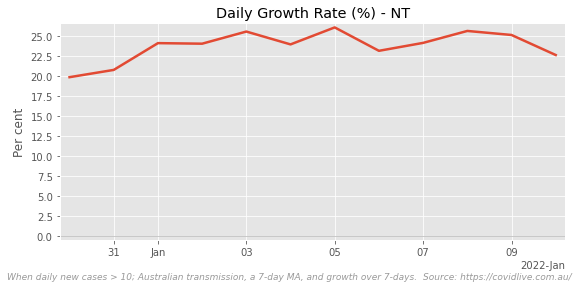

Queensland


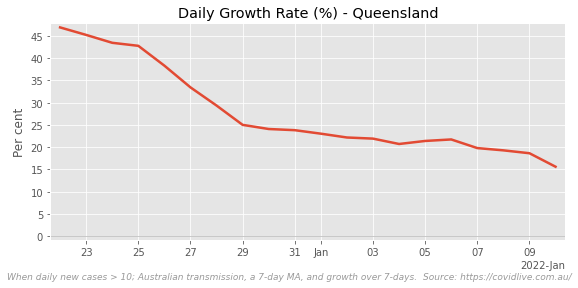

SA


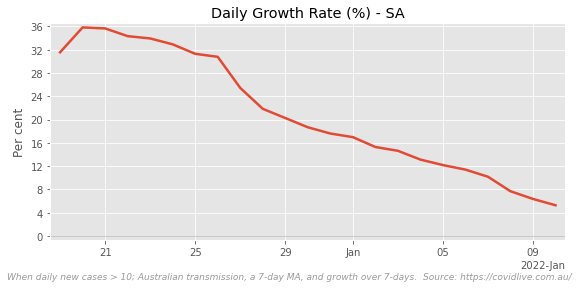

Tasmania


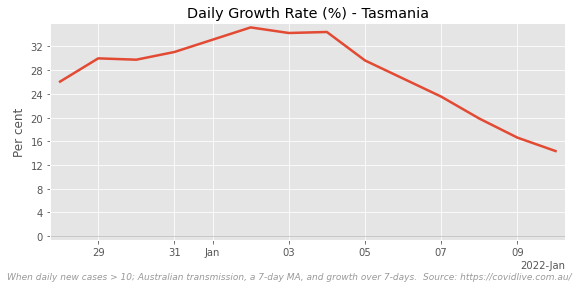

Victoria


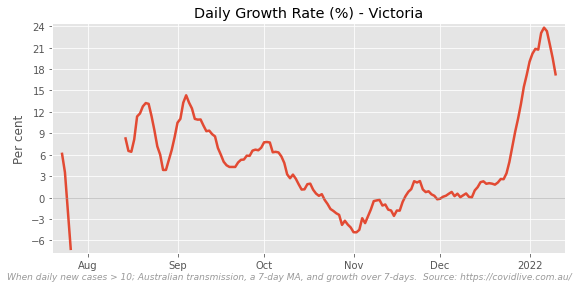

WA


In [166]:
loop_over_frame(daily_u[LOCAL], 'Daily Growth Rate (%)', daily_growth_rate, 
                ylabel='Per cent', recent=RECENT, lw=2.5, **std_plot_settings)

### Rolling doubling time

In [ ]:
# calculate using a regression best fit approach
def get_rolling_dt(name, state, start, stop, period):
    data = get_local_daily(state, start, stop).iloc[1:]  # ignore initial zero day
    if len(data) <= period:
        return None

    series = pd.Series(np.nan, index=data.index)
    for start in range(0, len(data) - period + 1):
        data_slice = data.iloc[start : start + period]
        result = get_exp_regression(data_slice)
        if result is None:
            return None
        y_pred, formula, k, a = result
        series[data_slice.index[-1]] = k

    series = series.dropna()
    lfooter = "Calc. from best fit for data points in rolling window"
    return series, lfooter

In [ ]:
# calculated from end-points on a Henderson smoothed series
def get_rolling_dt_hendo(name, state, start, stop, period):
    data = get_local_daily(state, start, stop).iloc[1:]  # ignore initial zero day
    if len(data) <= period:
        return None
    data = pd.Series(Henderson.Henderson(data, period), index=data.index)
    data = data.where((data > 1) | data.isna(), other=1.0)
    series = pd.Series(np.nan, index=data.index)
    for start in range(0, len(data) - period + 1):
        data_slice = data.iloc[start : start + period]
        k = np.log(data_slice.iloc[-1] / data_slice.iloc[0]) / period
        series[data_slice.index[-1]] = k

    series = series.dropna()
    lfooter = "Calc. from end-points on smoothed series in rolling window"

    return series, lfooter

In [ ]:
# this plotting function is a bit of a hack ...
def plot_exponents(data, name, period, lfooter, method=""):

    # constants
    MARGINS = 0.02

    # get canvass
    fig, axes = plt.subplots()
    fig.set_size_inches((8, 4))
    axes.margins(MARGINS)
    axes.set_ylabel("$k$ from $y=ae^{kt}$")

    # duplicate the axes
    axr = axes.twiny().twinx()
    axr.margins(MARGINS)
    axr.set_ylabel("Doubling time in days")

    # No x-ticks at the top
    axr.xaxis.set_ticks([])
    axr.xaxis.set_ticklabels([])

    # plot the data
    if data.ndim == 1:
        axes.plot(data.index, data, lw=2.5)
        axes.set_xlabel(None)
        lfooter += f". Latest DT: {np.log(2) / data.iloc[-1]:,.2f} days."
    else:
        for col in data.columns:
            axes.plot(data[col].index, data[col], lw=2.5, label=col)
        axes.legend(loc="best")
        axes.set_xlabel(f"Day of Outbreak (after first {period} days)")

    # right-hand y-axis
    locations = axes.get_yticks()
    new_labels = [f"{np.log(2)/x:,.2f}" if x != 0 else "∞" for x in locations]
    axr.yaxis.set_ticks(locations)
    axr.yaxis.set_ticklabels(new_labels)
    axr.set_axisbelow(True)

    # remove the grid
    axr.grid(False, which="both")

    # match the left and right ylimit settings
    axr.set_ylim(axes.get_ylim())
    axr.set_xlim(axes.get_xlim())

    # title
    title = f"{period}-day Rolling Growth - {name}"
    if method:
        title += f" ({method})"
    axes.set_title(title)

    fig.tight_layout(pad=1.1)

    # footers
    fig.text(
        0.01,
        0.005,
        lfooter,
        ha="left",
        va="bottom",
        fontsize=9,
        fontstyle="italic",
        color="#999999",
    )
    fig.text(
        0.99,
        0.005,
        SOURCE,
        ha="right",
        va="bottom",
        fontsize=9,
        fontstyle="italic",
        color="#999999",
    )

    # save
    filename = CHART_DIRECTORY + title + ".png"
    fig.savefig(filename, dpi=300)

    # display and close
    plt.show()
    plt.close("all")

### Growth Factors

In [ ]:
GROWTH_FACTOR = 5

def plot_growth_factors():
    growth_factors = {}
    for name, (state, start, length) in Vic_2020_vs_Delta.items():
        s = get_local_daily(state, start=start, stop=length)
        print(f"Check {name} starting point: {s[:2].values}")

        growth_factors[name] = ps.plot_growth_factor(
            s,
            period=GROWTH_FACTOR,
            mode="new local cases",
            title=f"{GROWTH_FACTOR}-Day Growth Factor - {name}",
            ylabel="Growth Factor",
            loc="lower center",
            xlabel=None,
            no_locator=True,
            **std_plot_settings,
        )

    return growth_factors


growth_factors = plot_growth_factors()

### Model for the effective reproduction number $R_{eff}$ using an SIR/SEIR model

In [ ]:
def model_effective_reproduction(
    newly_infected_on_day: pd.Series,
    exposure_period: int = 2,
    infectious_period: int = 5,
    smooth_term: int = 13, # smooth over the fortnight 
    week_adjust = False,
):
    """Return a smoothed series for the effective reproduction 
       number (R_eff).  We smooth to manage noise, most of which 
       is an artefact of administrative systems (eg. more daily 
       new cases are detected on weekdays compared with weekends)."""
    
    # drop it, if first day zero 
    if newly_infected_on_day.iloc[0] == 0:
        newly_infected_on_day = newly_infected_on_day.iloc[1:]
    
    # seasonal adjustment, if we can
    if week_adjust and (newly_infected_on_day > 0).all():
        adjusted_daily_new = weekly_adjust(newly_infected_on_day)
    else:
        adjusted_daily_new = newly_infected_on_day
        
    # The early data in an outbreak is exceedingly volatile
    EARLY_NOISE = 3  # days
    IGNORE_INITIAL = infectious_period + exposure_period + EARLY_NOISE  # days

    # sanity check
    if len(adjusted_daily_new) < smooth_term:
        print("Insufficient data to calculate the effective reproduction number")
        return None

    total_infectious_yesterday = ( 
        adjusted_daily_new.rolling(infectious_period)
        .sum()
        .shift(exposure_period + 1) # +1 --> total infectious yesterday
        .dropna()
    )

    r_eff = Henderson.Henderson((adjusted_daily_new / total_infectious_yesterday 
                                 * infectious_period)[IGNORE_INITIAL:]
                                , smooth_term)
    return r_eff, exposure_period, infectious_period

In [ ]:
def plot_reproduction_numbers(maxspan=1000):
    repo_numbers = {}
    for name, (state, start, length) in Vic_2020_vs_Delta.items():

        # calculate
        span = length if length else maxspan # days
        s = get_local_daily(state, start=start, stop=span)
        results = model_effective_reproduction(s)
        if results is None:
            continue
        r_eff, e_period, i_period = results
        repo_numbers[name] = r_eff

        # plot
        _, axes = plt.subplots()
        axes.plot(r_eff.index.values, r_eff.values, lw=2.5, label=name)
        axes.axhline(y=1, color="#999999", lw=0.5, linestyle="-")
        ps.finalise_plot(
            axes,
            title="Effective Reproduction Number ($R_{eff}$) - " f"{name}",
            ylabel="$R_{eff}$",
            xlabel=None,
            lfooter="$R_{eff}$ at series end: "
            f"{r_eff[-1]:0.3f};  Assumptions: "
            f"exposure={e_period} days; infectious={i_period} days",
            **std_plot_settings,
        )

    return repo_numbers


repo_numbers = plot_reproduction_numbers()

### Comparative $R_{eff}$ and GF

Note that the 5-day on 5-day growth factor is a good proxy for the effective reproduction number (in this case).

In [ ]:
def plot_comparative_Rt_GF(repo_numbers, growth_factors):

    frames = {}
    MAX_FACTOR = 6  # used for capping the y axis (None to ignore)
    for name, series in repo_numbers.items():

        period = GROWTH_FACTOR
        dict_frame = {}
        rt_label = "Eff. reproduction # ($R_{eff}$)"
        dict_frame[rt_label] = series
        if name in growth_factors:
            shift = int(-period // 2) + 1
            shifted = growth_factors[name].shift(shift)
            dict_frame[
                f"{period}-day on {period}-day growth " f"factor shifted {shift} days"
            ] = shifted

        frames[name] = pd.DataFrame(dict_frame).dropna(how="all")
        frames[name] = frames[name][frames[name][rt_label].notna()]

        _, axes = plt.subplots()
        colours = [
            "#dd0000",
            "darkorange",
            "royalblue",
        ]
        tag = "At end:  "
        for col in frames[name].columns:
            line = frames[name][col].copy()
            tag += f"{col}: {line.dropna()[-1]:0.1f}   "
            if MAX_FACTOR:
                line = line.where(line < MAX_FACTOR, other=np.nan)
            axes.plot(line.index.values, line.values, lw=2.5, c=colours.pop(), label=col)
        axes.axhline(y=1, lw=0.5, c="#999999")
        axes.legend(loc="best", prop={"size": 8})
        ps.finalise_plot(
            axes,
            title=f"COVID-19 Growth - {name}",
            ylabel="Factor / Number",
            lfooter=tag,
            xlabel=None,
            **std_plot_settings,
        )


plot_comparative_Rt_GF(repo_numbers, growth_factors)

### Short-run projections for local new case growth
$$
y = x_{0}e^{kt}; 
$$
Where ...
$$
k = \frac{ln(\frac{x_t}{x_{t-n}})}{n}
$$

In [ ]:
def extrapolate(name, state, start, stop):
    """Construct an exponential short-run projection based on recent period growth.
       Note: on small numbers, this model can be overwhelmed by noise."""

    # projection parameters
    outlook = 8  # projection days
    term = 15  # days - term for henderson moving average
    pperiod = [
        3,
        7,
    ]  # most recent days for establishing growth projection

    # get current underlying trend
    s = get_local_daily(state, start=start, stop=stop)
    if len(s) <= term:
        print(f"{name}: insufficient data for a forecast")
        return
    s_smoothed = Henderson.Henderson(s, term)

    # calculate daily exponetial growth rate
    INDEX_CASE = -1
    stop = max(0, s_smoothed[INDEX_CASE])
    projections = {}
    for period in pperiod:
        if period > term:
            continue
        if period > len(s_smoothed):
            continue
        start = max(0, s_smoothed[-period])
        if start == 0:
            continue
        k = np.log(stop / start) / period
        # print(f'start, stop, k: {start, stop, k}')
        projection = np.arange(0, outlook)
        projection = stop * np.exp(projection * k)
        projection = pd.Series(
            projection,
            index=pd.date_range(s.index[INDEX_CASE], periods=outlook, freq="D"),
        )
        projection = projection.drop(projection.index[0])
        projections[
            f"Projection based on last {period} days ~ $y="
            f"{stop:,.2f}"
            "e^{"
            f"{k:.4f}t"
            "}$"
        ] = projection
        print(f"{period}: {projection.round(1).to_list()}")

    pframe = {"Historic cases": s, "Smoothed cases": s_smoothed, **projections}
    pframe = pd.DataFrame(pframe)

    colours = ["#dd0000", "darkorange", "dodgerblue", "darkblue"]
    line_width = [2.5, 1, 2.5, 2.5, 2.5]
    _, axes = plt.subplots()
    for i, col in enumerate(pframe.columns.to_list()):
        line = pframe[col]
        axes.plot(line.index, line, c=colours[i], lw=line_width[i], label=col)

    axes.legend(loc="best", prop={"size": 8})
    ps.finalise_plot(
        axes,
        title=f"Outbreak Projection for {name}",
        xlabel=None,
        ylabel="Number of daily new cases",
        **std_plot_settings,
    )

In [ ]:
def plot_short_run_projections():

    for name, (state, start, stop) in Current_outbreaks.items():
        extrapolate(name, state, start, stop)
        
plot_short_run_projections()

## The End

In [ ]:
%load_ext watermark
%watermark -u -n -t -v -iv -w

In [ ]:
print_warnings()
print("Finished")

# 